# Importing Libraries

In [1]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import iplot

import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [2]:
df = pd.read_csv('/home/kipkorir/student_spending (1).csv')
df.head(10)

Unnamed: 0  age      gender year_in_school             major  \
0           0   19  Non-binary       Freshman        Psychology   
1           1   24      Female         Junior         Economics   
2           2   24  Non-binary         Junior         Economics   
3           3   23      Female         Senior  Computer Science   
4           4   20      Female         Senior  Computer Science   
5           5   25  Non-binary      Sophomore  Computer Science   
6           6   23      Female       Freshman       Engineering   
7           7   23      Female         Junior         Economics   
8           8   22  Non-binary         Senior  Computer Science   
9           9   18      Female         Junior  Computer Science   

   monthly_income  financial_aid  tuition  housing  food  transportation  \
0             958            270     5939      709   296             123   
1            1006            875     4908      557   365              85   
2             734            928     3051      666   220             137   
3             617            265     4935      652   289             114   
4             810            522     3887      825   372             168   
5             523            790     3151      413   386             122   
6            1354             69     4973      812   398             101   
7             631            748     3966      571   269              92   
8            1402            248     5638      599   354              82   
9            1423             74     3977      626   249             117   

   books_supplies  entertainment  personal_care  technology  health_wellness  \
0             188             41             78         134              127   
1             252             74             92         226              129   
2              99            130             23         239              112   
3             223             99             30         163              105   
4             194             48             71          88               71   
5             131             73             38         234              108   
6             213             21             38         157              117   
7             251             37             90         152               56   
8             155            123             41         162              172   
9             123             51             74         243               34   

   miscellaneous preferred_payment_method  
0             72        Credit/Debit Card  
1             68        Credit/Debit Card  
2            133                     Cash  
3             55       Mobile Payment App  
4            104        Credit/Debit Card  
5             99       Mobile Payment App  
6             48        Credit/Debit Card  
7             62       Mobile Payment App  
8            194        Credit/Debit Card  
9            196       Mobile Payment App

# Data Cleaning

## Check the Dtypes of the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                1000 non-null   int64 
 1   age                       1000 non-null   int64 
 2   gender                    1000 non-null   object
 3   year_in_school            1000 non-null   object
 4   major                     1000 non-null   object
 5   monthly_income            1000 non-null   int64 
 6   financial_aid             1000 non-null   int64 
 7   tuition                   1000 non-null   int64 
 8   housing                   1000 non-null   int64 
 9   food                      1000 non-null   int64 
 10  transportation            1000 non-null   int64 
 11  books_supplies            1000 non-null   int64 
 12  entertainment             1000 non-null   int64 
 13  personal_care             1000 non-null   int64 
 14  technology               

## Check the dataset's columns

In [4]:
df.columns

Index(['Unnamed: 0', 'age', 'gender', 'year_in_school', 'major',
       'monthly_income', 'financial_aid', 'tuition', 'housing', 'food',
       'transportation', 'books_supplies', 'entertainment', 'personal_care',
       'technology', 'health_wellness', 'miscellaneous',
       'preferred_payment_method'],
      dtype='object')

## Total number of rows and columns

In [5]:
df.shape

(1000, 18)

## Check for missing numbers

In [6]:
df.isnull().sum()

Unnamed: 0                  0
age                         0
gender                      0
year_in_school              0
major                       0
monthly_income              0
financial_aid               0
tuition                     0
housing                     0
food                        0
transportation              0
books_supplies              0
entertainment               0
personal_care               0
technology                  0
health_wellness             0
miscellaneous               0
preferred_payment_method    0
dtype: int64

## Check for duplicates

In [7]:
df.duplicated().sum()

0

### Since there are no missing values or duplicates, thus the dataset is clean. We will not remove outliers in this kind of dataset

# Statistical Summary

In [8]:
df.describe()

Unnamed: 0          age  monthly_income  financial_aid      tuition  \
count  1000.000000  1000.000000     1000.000000    1000.000000  1000.000000   
mean    499.500000    21.675000     1020.650000     504.771000  4520.395000   
std     288.819436     2.322664      293.841161     287.092575   860.657944   
min       0.000000    18.000000      501.000000       0.000000  3003.000000   
25%     249.750000    20.000000      770.750000     261.000000  3779.750000   
50%     499.500000    22.000000     1021.000000     513.000000  4547.500000   
75%     749.250000    24.000000     1288.250000     751.500000  5285.000000   
max     999.000000    25.000000     1500.000000    1000.000000  6000.000000   

          housing         food  transportation  books_supplies  entertainment  \
count  1000.00000  1000.000000      1000.00000     1000.000000    1000.000000   
mean    696.00600   252.642000       124.63700      174.761000      84.814000   
std     171.21862    86.949606        43.55799       72.404518      37.970451   
min     401.00000   100.000000        50.00000       50.000000      20.000000   
25%     538.75000   175.000000        88.00000      112.000000      54.000000   
50%     704.50000   255.000000       123.00000      175.000000      86.000000   
75%     837.25000   330.000000       162.25000      238.000000     116.000000   
max    1000.00000   400.000000       200.00000      300.000000     150.000000   

       personal_care   technology  health_wellness  miscellaneous  
count    1000.000000  1000.000000      1000.000000    1000.000000  
mean       60.699000   178.304000       114.310000     108.910000  
std        22.898007    71.744441        49.591544      52.412221  
min        20.000000    50.000000        30.000000      20.000000  
25%        41.000000   114.000000        73.000000      63.750000  
50%        62.000000   178.000000       115.000000     110.000000  
75%        80.000000   241.000000       158.000000     153.000000  
max       100.000000   300.000000       200.000000     200.000000

In [9]:
df.describe().style.background_gradient(cmap = 'plasma')

# Exploratory (EDA)

### Descriptive Statistics

#### Compute summary statistics for numerical variables like age, monthly income, and various expenses. This helps in understanding the central tendency, spread, and variability of the data.

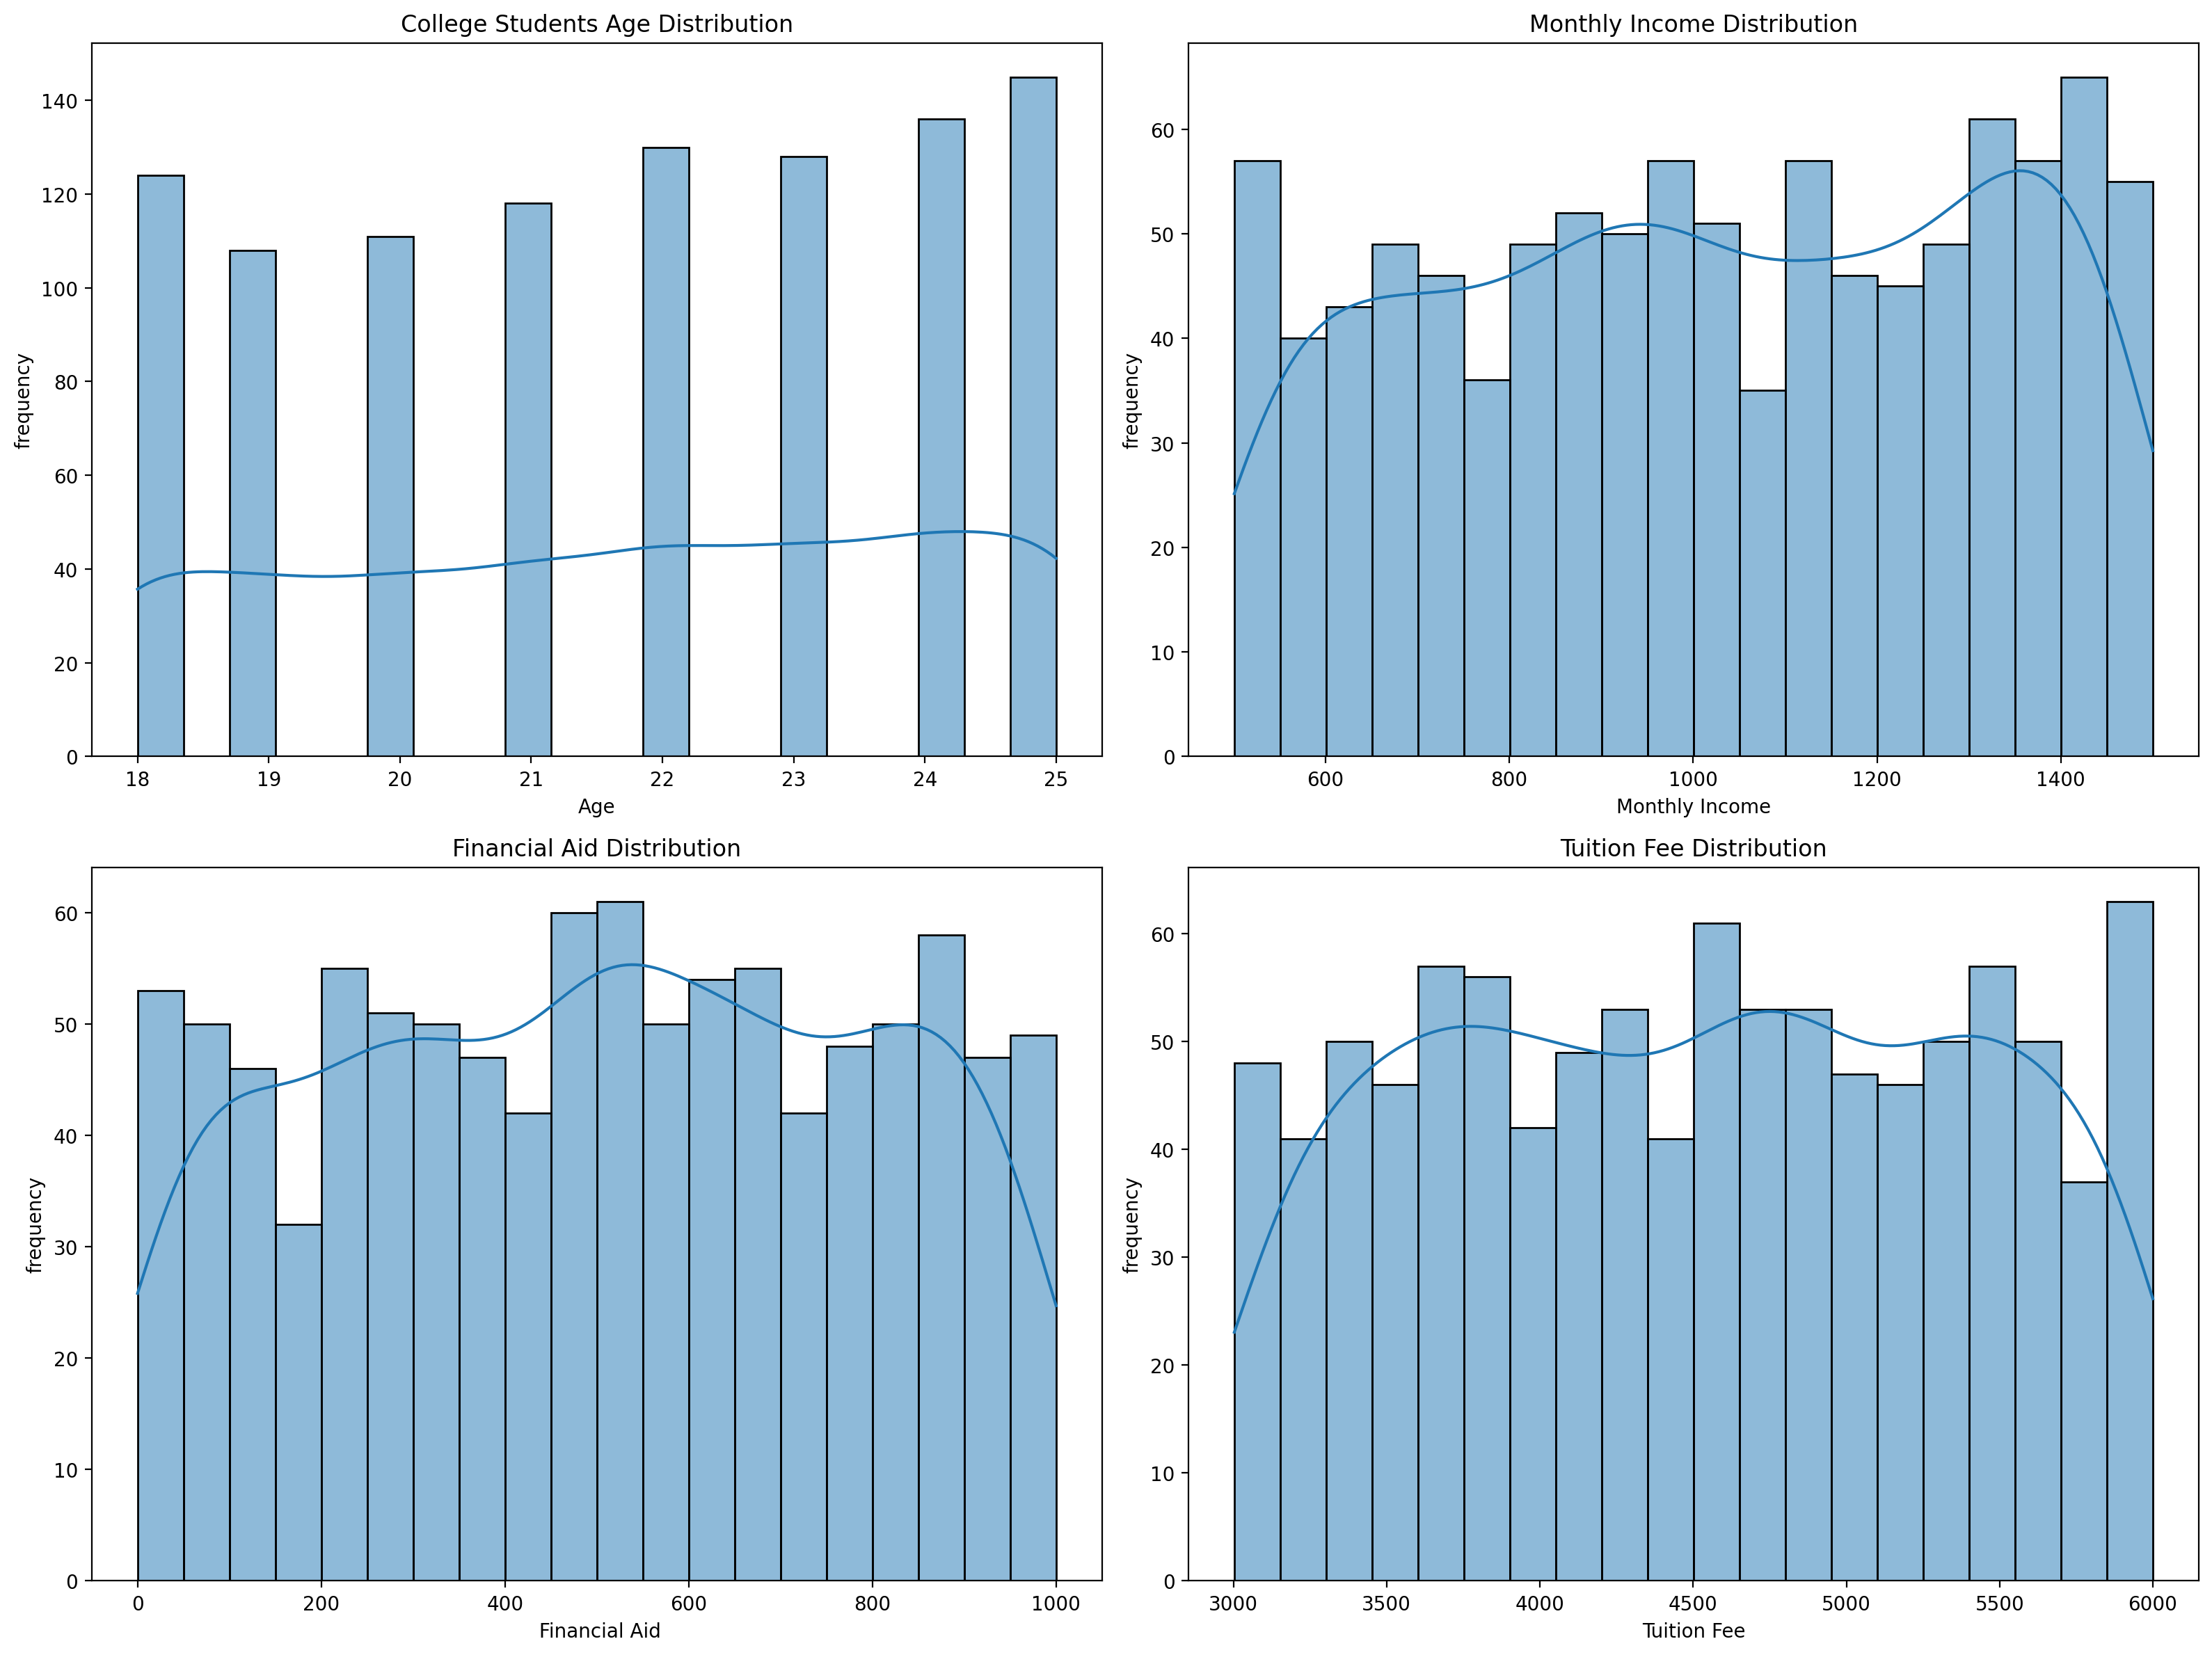

In [10]:
fig, ax = plt.subplots(2, 2, figsize = (16, 12), dpi = 200)
# Histogram of Age
sns.histplot(df['age'], bins = 20, kde = True, ax = ax[0, 0])
ax[0, 0].set_title('College Students Age Distribution')
ax[0, 0].set_xlabel('Age')
ax[0, 0].set_ylabel('frequency')

# Histogram of Monthly Income
sns.histplot(df['monthly_income'], bins = 20, kde = True, ax = ax[0, 1])
ax[0, 1].set_title('Monthly Income Distribution')
ax[0, 1].set_xlabel('Monthly Income')
ax[0, 1].set_ylabel('frequency')

# Histogram of Financial Aid
sns.histplot(df['financial_aid'], bins = 20, kde = True, ax = ax[1, 0])
ax[1, 0].set_title('Financial Aid Distribution')
ax[1, 0].set_xlabel(' Financial Aid')
ax[1, 0].set_ylabel('frequency')

# Histogram of Tuition Fee
sns.histplot(df['tuition'], bins = 20, kde = True, ax = ax[1, 1])
ax[1, 1].set_title('Tuition Fee Distribution')
ax[1, 1].set_xlabel('Tuition Fee')
ax[1, 1].set_ylabel('frequency')

plt.tight_layout()
plt.show()

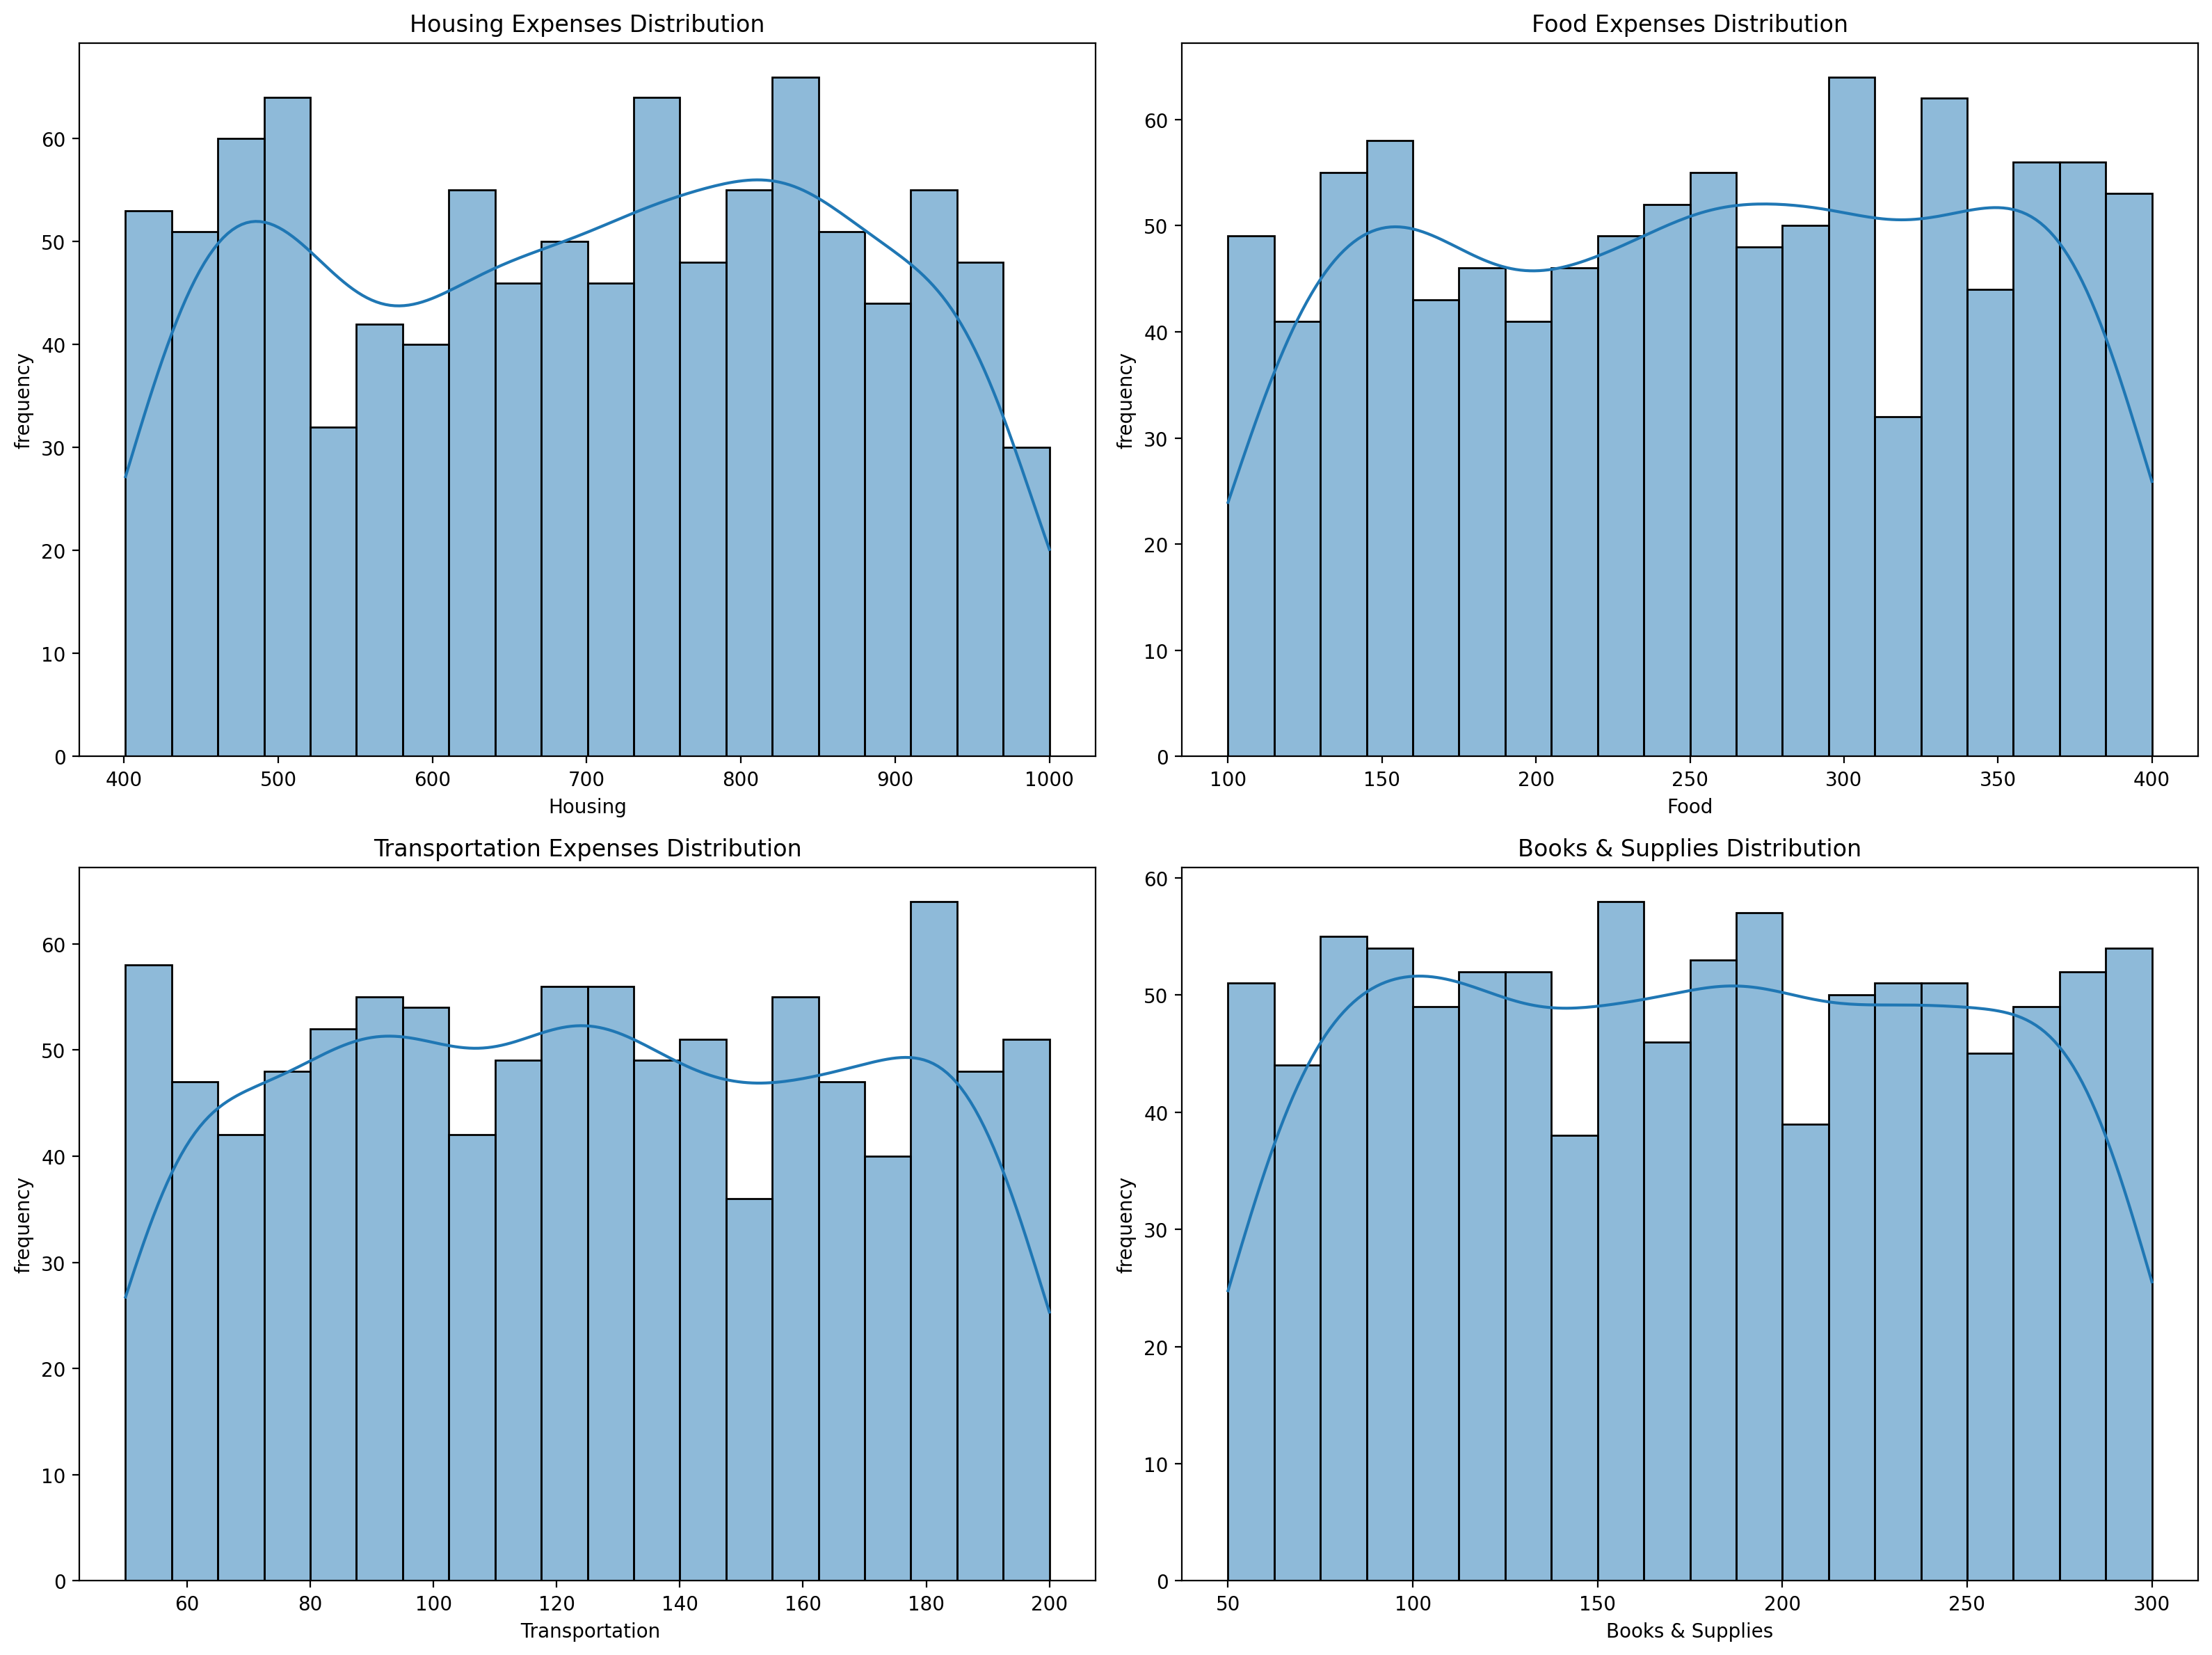

In [11]:
fig, ax = plt.subplots(2, 2, figsize = (16, 12), dpi = 200)
# Histogram of Housing Expenses
sns.histplot(df['housing'], bins = 20, kde = True, ax = ax[0, 0])
ax[0, 0].set_title('Housing Expenses Distribution')
ax[0, 0].set_xlabel('Housing')
ax[0, 0].set_ylabel('frequency')

# Histogram of Food expenses
sns.histplot(df['food'], bins = 20, kde = True, ax = ax[0, 1])
ax[0, 1].set_title('Food Expenses Distribution')
ax[0, 1].set_xlabel('Food')
ax[0, 1].set_ylabel('frequency')

# Histogram of Transportation Expenses
sns.histplot(df['transportation'], bins = 20, kde = True, ax = ax[1, 0])
ax[1, 0].set_title('Transportation Expenses Distribution')
ax[1, 0].set_xlabel(' Transportation')
ax[1, 0].set_ylabel('frequency')

# Histogram of books & Supplies
sns.histplot(df['books_supplies'], bins = 20, kde = True, ax = ax[1, 1])
ax[1, 1].set_title('Books & Supplies Distribution')
ax[1, 1].set_xlabel('Books & Supplies')
ax[1, 1].set_ylabel('frequency')

plt.tight_layout()
plt.show()

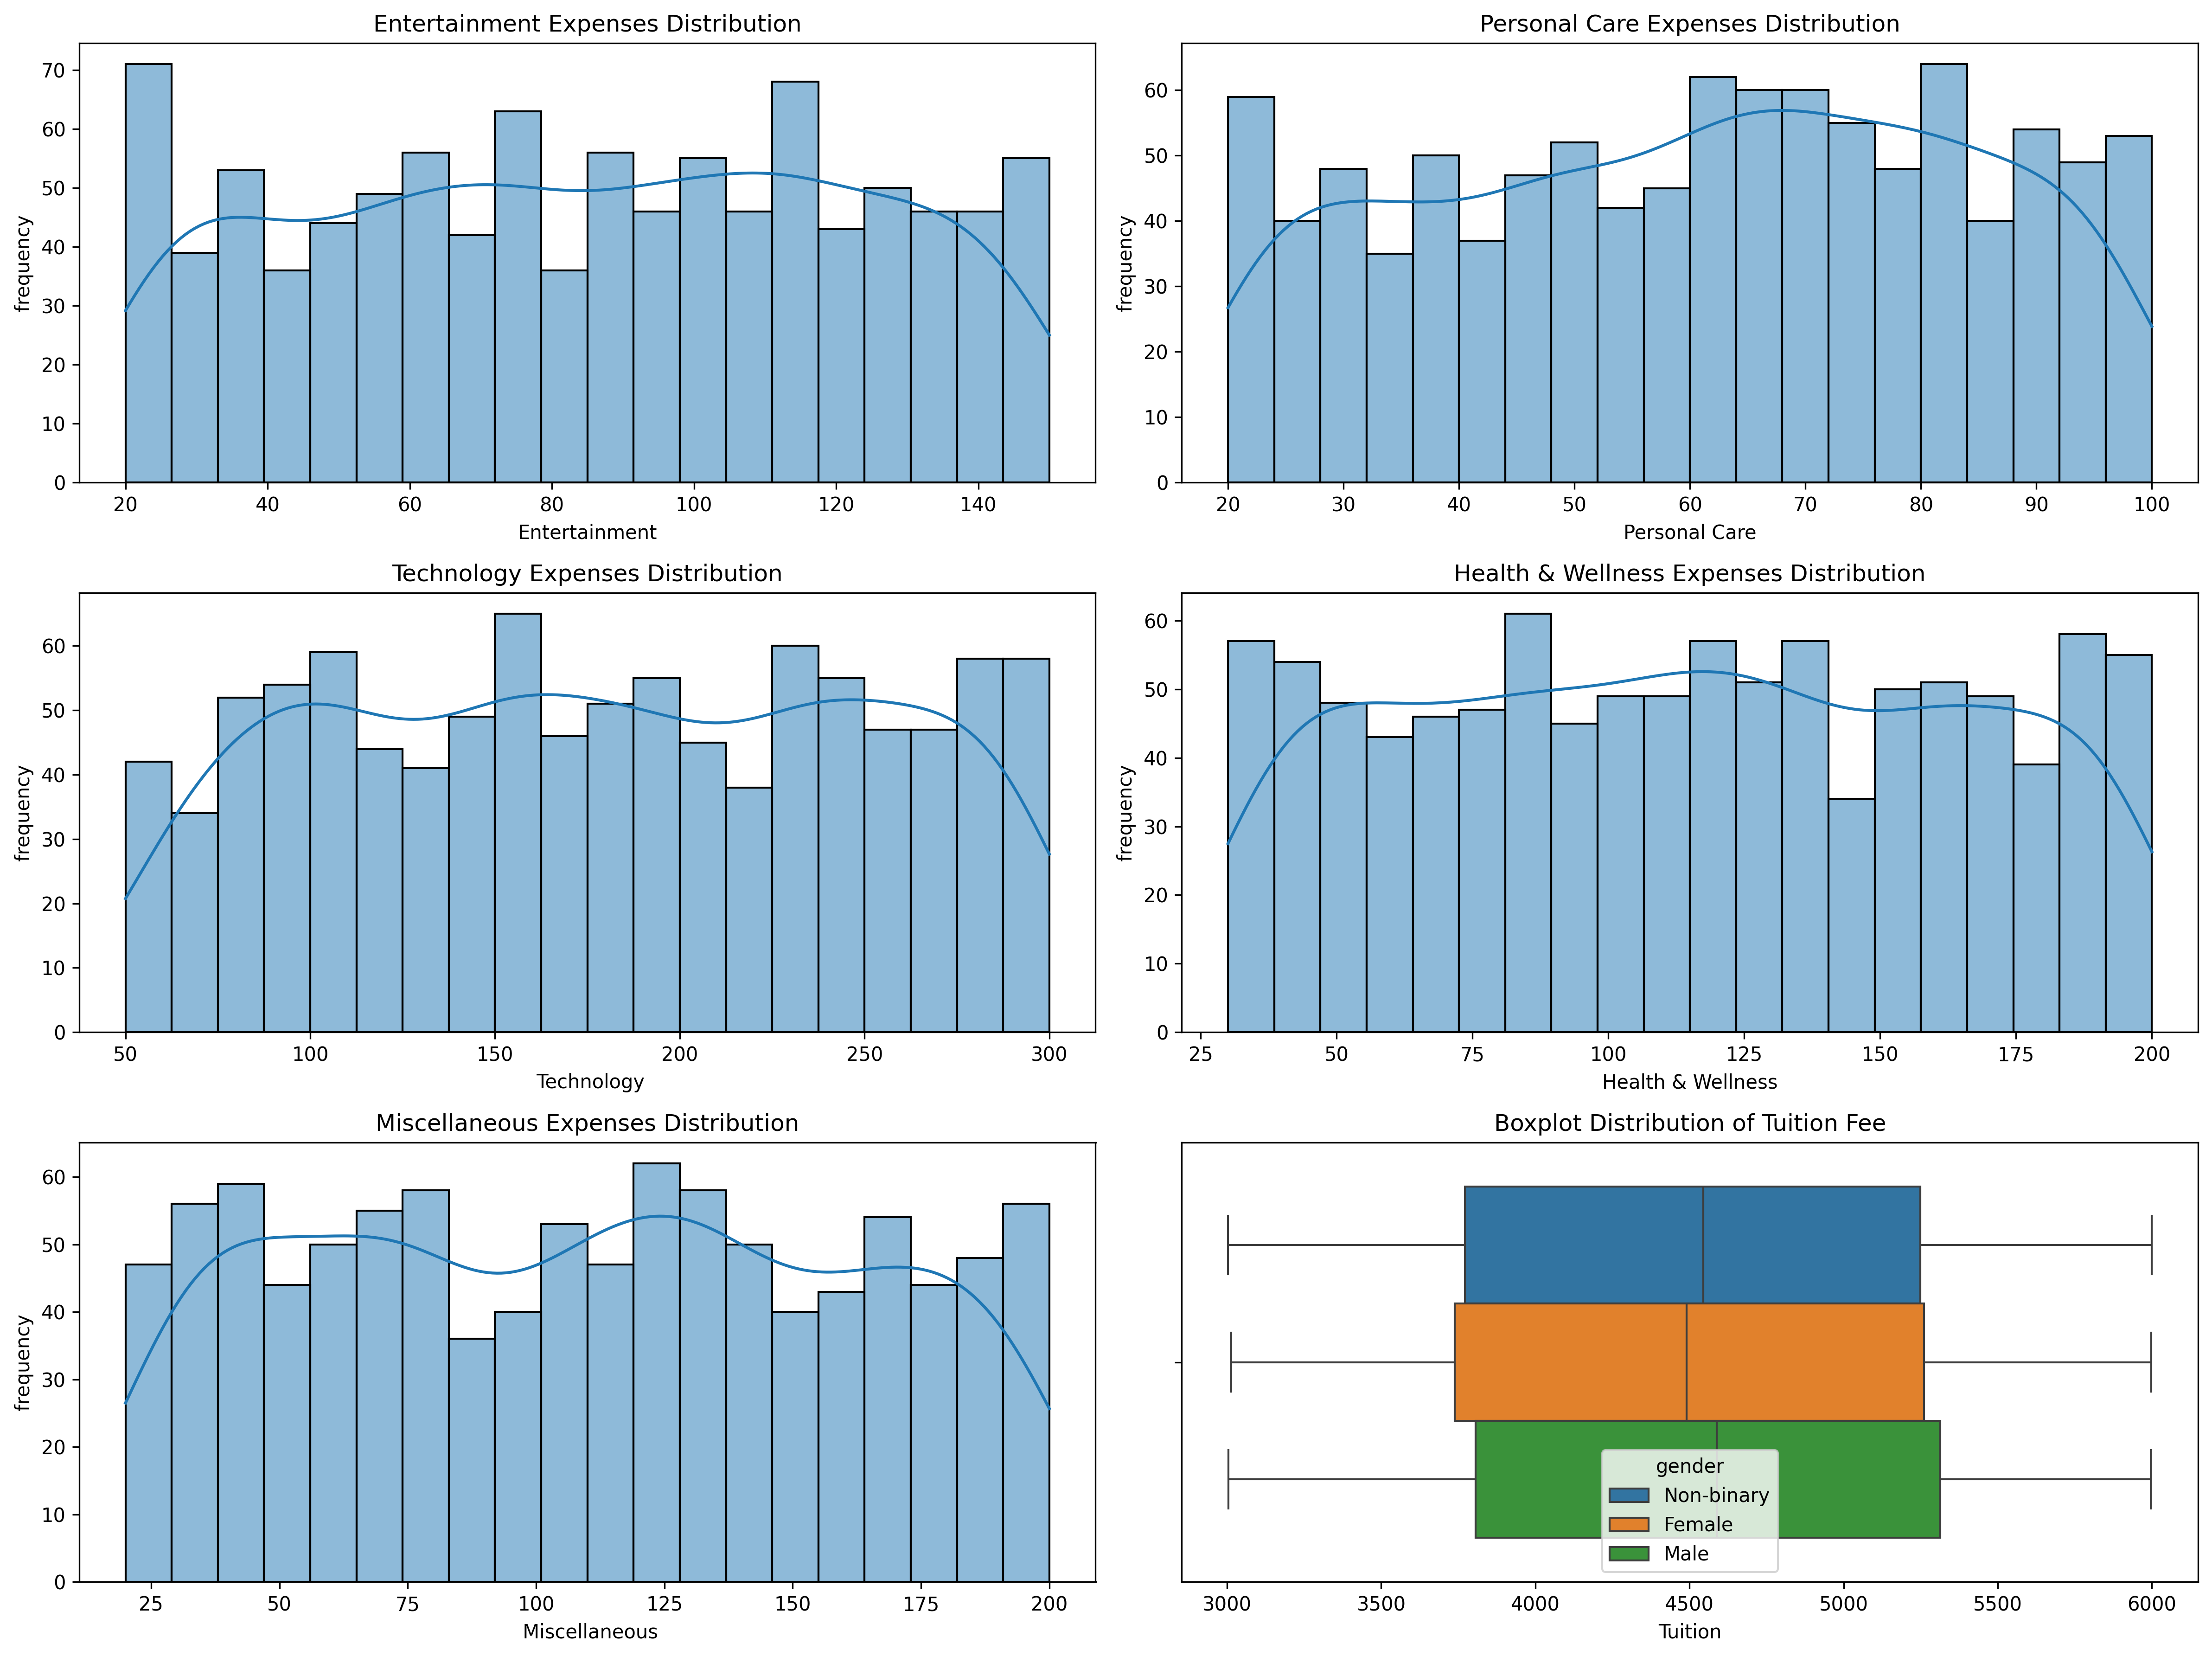

In [12]:
fig, ax = plt.subplots(3, 2, figsize = (16, 12), dpi = 300)
# Histogram of Entertainment Expenses
sns.histplot(df['entertainment'], bins = 20, kde = True, ax = ax[0, 0])
ax[0, 0].set_title('Entertainment Expenses Distribution')
ax[0, 0].set_xlabel('Entertainment')
ax[0, 0].set_ylabel('frequency')

# Histogram of Personal Care expenses
sns.histplot(df['personal_care'], bins = 20, kde = True, ax = ax[0, 1])
ax[0, 1].set_title('Personal Care Expenses Distribution')
ax[0, 1].set_xlabel('Personal Care')
ax[0, 1].set_ylabel('frequency')

# Histogram of Technology Expenses
sns.histplot(df['technology'], bins = 20, kde = True, ax = ax[1, 0])
ax[1, 0].set_title('Technology Expenses Distribution')
ax[1, 0].set_xlabel(' Technology')
ax[1, 0].set_ylabel('frequency')

# Histogram of Health & Wellness
sns.histplot(df['health_wellness'], bins = 20, kde = True, ax = ax[1, 1])
ax[1, 1].set_title('Health & Wellness Expenses Distribution')
ax[1, 1].set_xlabel('Health & Wellness')
ax[1, 1].set_ylabel('frequency')

# Histogram of Miscellaneous Expenses
sns.histplot(df['miscellaneous'], bins = 20, kde = True, ax = ax[2, 0],)
ax[2, 0].set_title('Miscellaneous Expenses Distribution')
ax[2, 0].set_xlabel(' Miscellaneous')
ax[2, 0].set_ylabel('frequency')

# Boxplot of Tuition Fee
sns.boxplot(x = 'tuition',data = df, ax = ax[2, 1], hue = 'gender')
ax[2, 1].set_title('Boxplot Distribution of Tuition Fee')
ax[2, 1].set_xlabel('Tuition')

plt.tight_layout()
plt.show()

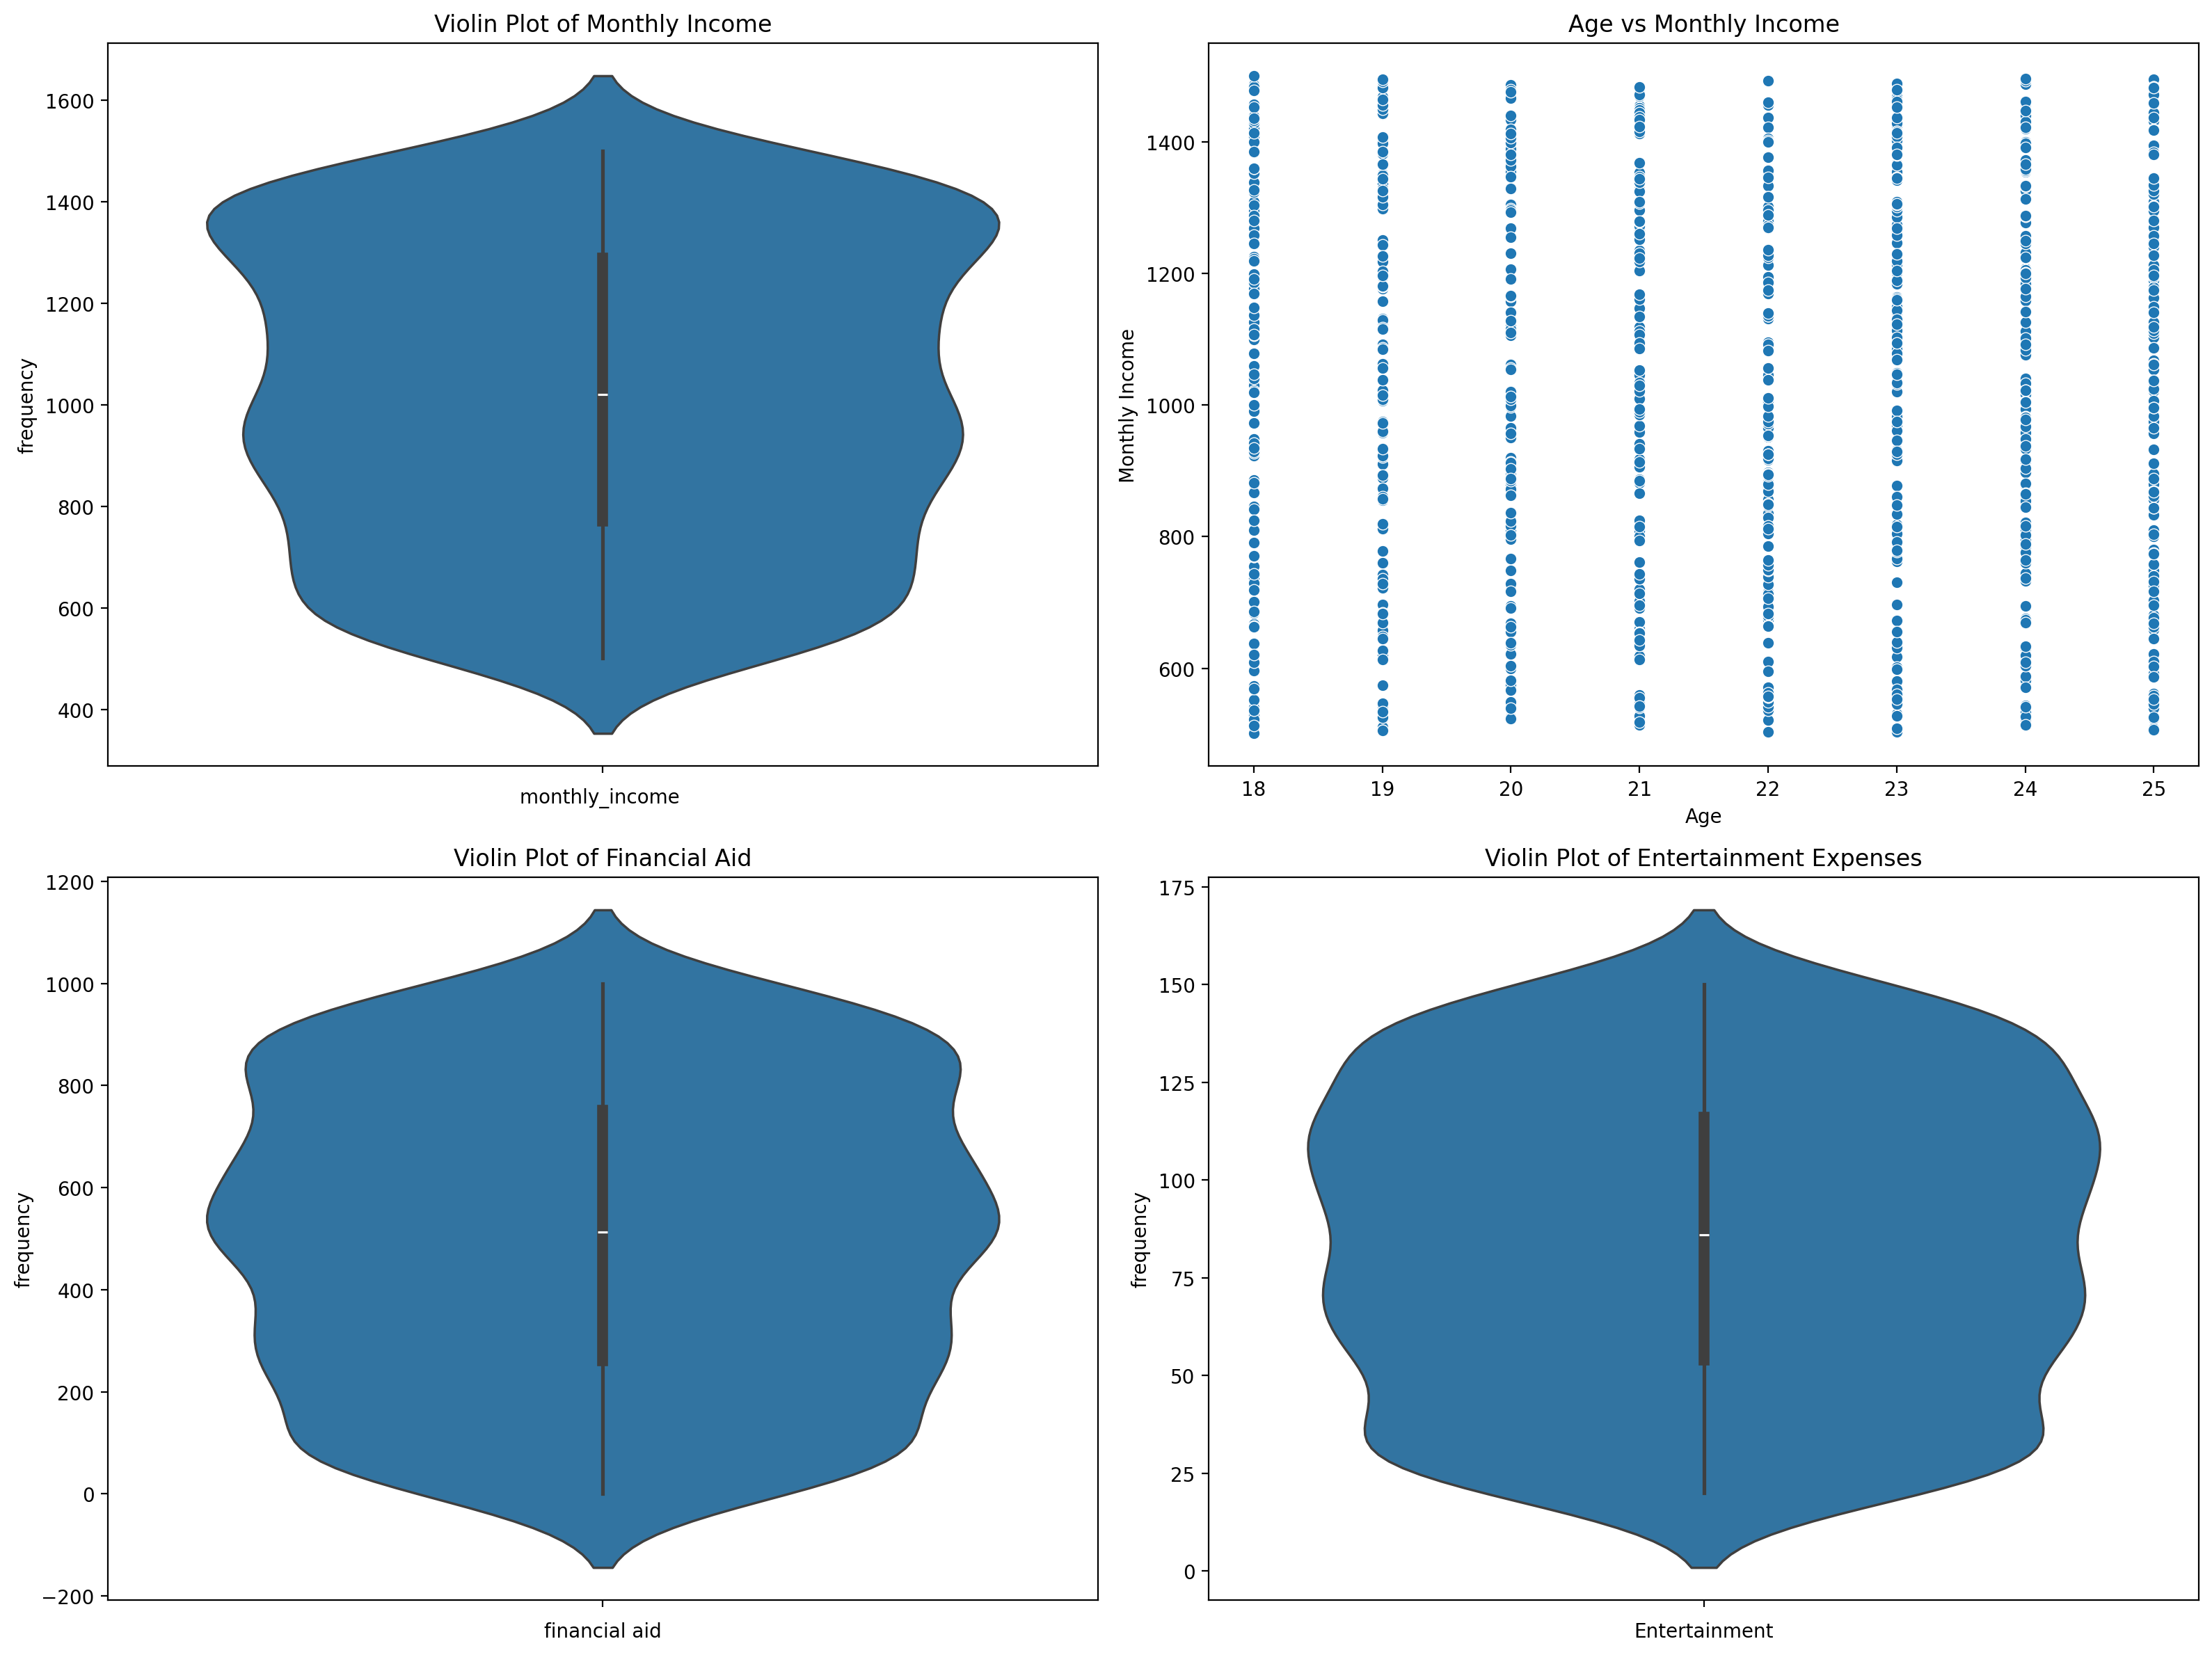

In [13]:
fig, ax = plt.subplots(2, 2, figsize = (16, 12), dpi = 200)
# Violinplot of Monthly Income
sns.violinplot(df['monthly_income'], ax = ax[0, 0])
ax[0, 0].set_title('Violin Plot of Monthly Income')
ax[0, 0].set_xlabel('monthly_income ')
ax[0, 0].set_ylabel('frequency')

# Scatterplot of age vs Monthly Income of Food expenses
sns.scatterplot(df, x = 'age', y = 'monthly_income', ax = ax[0, 1])
ax[0, 1].set_title('Age vs Monthly Income')
ax[0, 1].set_xlabel('Age')
ax[0, 1].set_ylabel('Monthly Income')

# Violinplot of Financial Aid
sns.violinplot(df['financial_aid'], ax = ax[1, 0])
ax[1, 0].set_title('Violin Plot of Financial Aid')
ax[1, 0].set_xlabel('financial aid')
ax[1, 0].set_ylabel('frequency')

# Violinplot of Entertainment Expenses
sns.violinplot(df['entertainment'], ax = ax[1, 1])
ax[1, 1].set_title('Violin Plot of Entertainment Expenses')
ax[1, 1].set_xlabel('Entertainment')
ax[1, 1].set_ylabel('frequency')

plt.tight_layout()
plt.show()

### Data Distribution

#### Visualize the distributions of numerical variables using histograms or density plots. This helps in identifying any skewness or outliers in the data

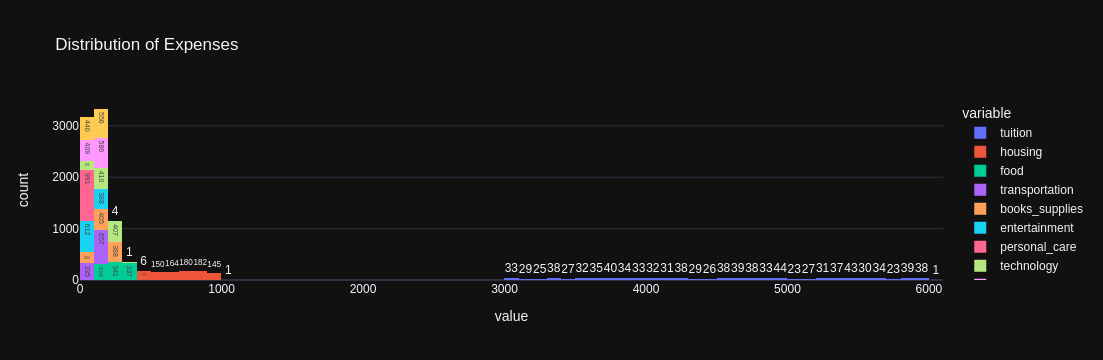

In [14]:
# Create histograms for various expenses
iplot(px.histogram( df, x=['tuition', 'housing', 'food', 'transportation', 'books_supplies', 
                                   'entertainment', 'personal_care', 'technology', 'health_wellness', 
                                   'miscellaneous'],  
             template = 'plotly_dark', 
             title = 'Distribution of Expenses', 
             text_auto = True, 
             labels = {'y' : 'Frequency', 'x' : 'Expenses'}))

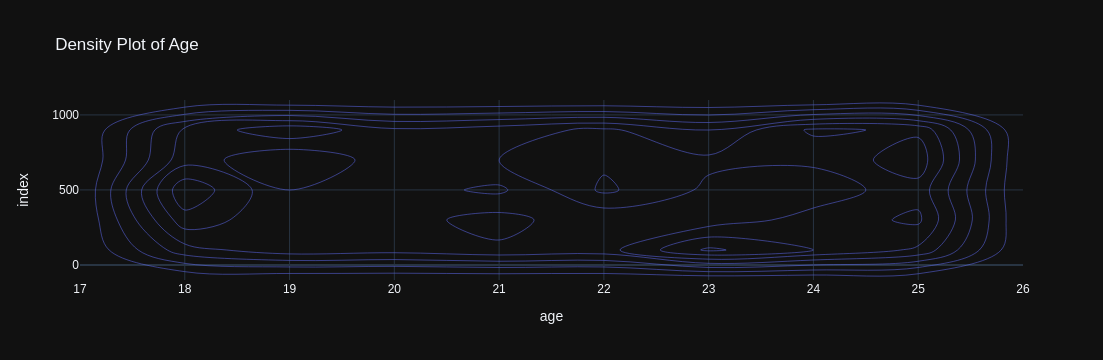

In [15]:
# Create a density plot for Age
iplot(px.density_contour( df, x= 'age',  
             template = 'plotly_dark', 
             title = 'Density Plot of Age', 
             text_auto = True, 
             labels = {'y' : 'Frequency', 'x' : 'age'}))

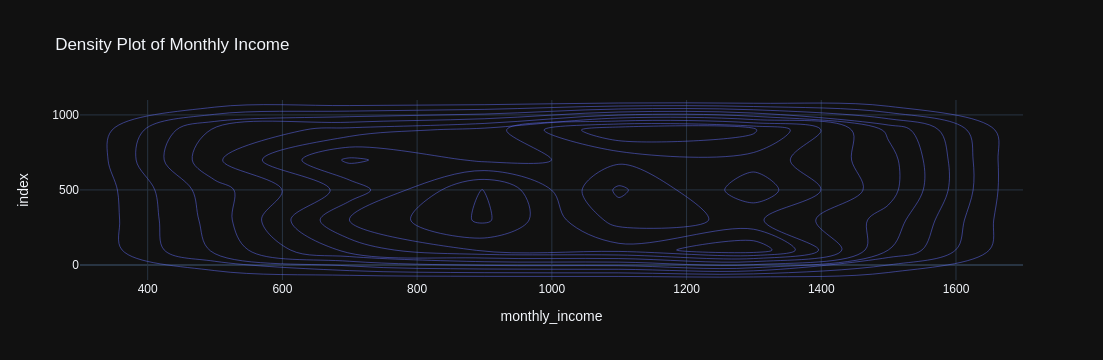

In [16]:
# Create a density plot for Monthly Income
fig_income_density = px.density_contour(df, x='monthly_income', title='Density Plot of Monthly Income', template = 'plotly_dark')
fig_income_density.show()

### Categorical Variables Analysis

#### Explore categorical variables like gender, year in school, and major using bar charts or pie charts. This helps in understanding the distribution of students across different categories. Write me some code examples to plot graphs and charts about it using the students spending habits dataset

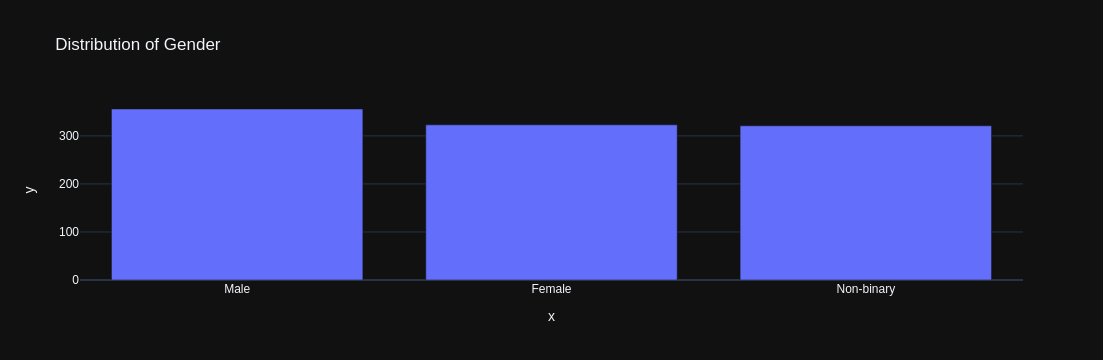

In [17]:
# Create a bar chart for Gender
fig_gender = px.bar(df['gender'].value_counts(), 
                     x=df['gender'].value_counts().index, 
                    template = 'plotly_dark', 
                     y=df['gender'].value_counts().values, 
                     title='Distribution of Gender')
fig_gender.show()

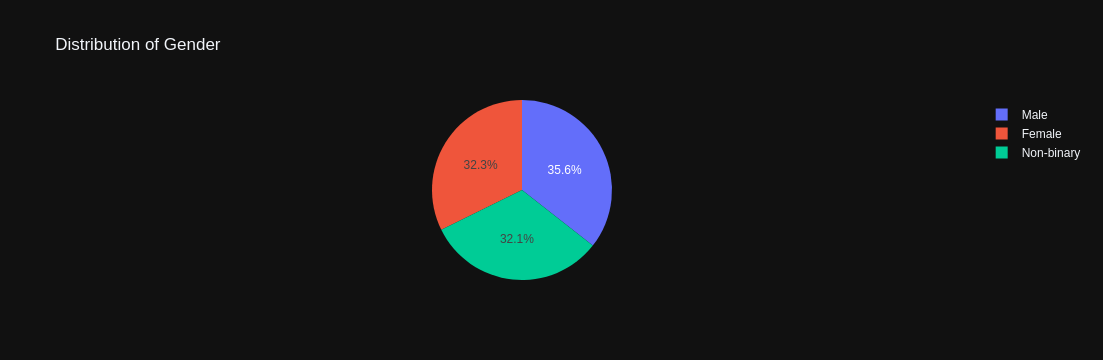

In [38]:
# Create a pie chart for Gender
fig_gender_pie = px.pie(df['gender'].value_counts(), 
                        values=df['gender'].value_counts().values, 
                        names=df['gender'].value_counts().index, 
                        template = 'plotly_dark', 
                        title='Distribution of Gender')
fig_gender_pie.show()

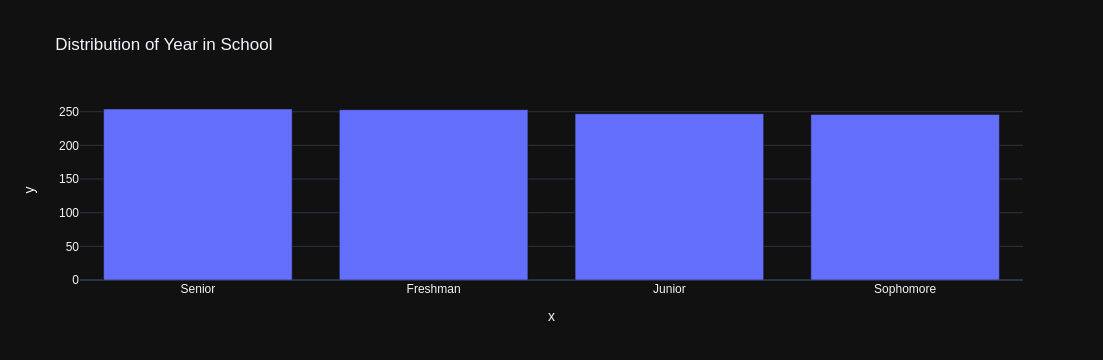

In [19]:
# Create a bar chart for Year in School
fig_year = px.bar(df['year_in_school'].value_counts(), 
                  x=df['year_in_school'].value_counts().index, 
                  template = 'plotly_dark', 
                  y=df['year_in_school'].value_counts().values, 
                  title='Distribution of Year in School')
fig_year.show()

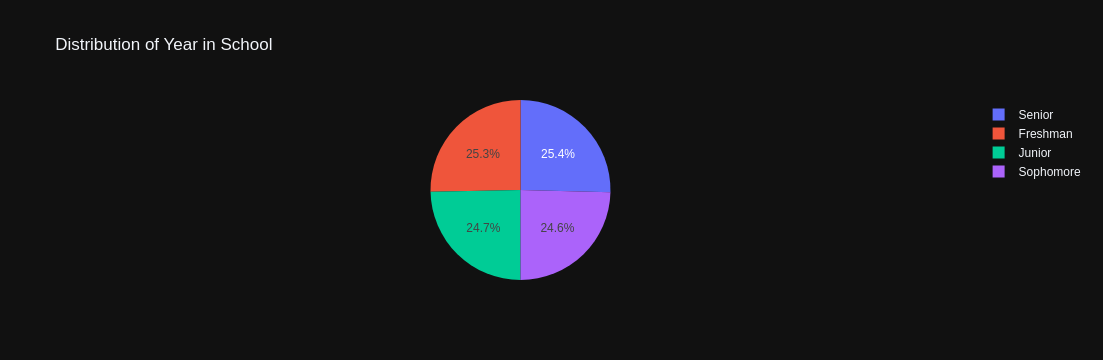

In [39]:
# Create a pie chart for Year in School
fig_year_pie = px.pie(df['year_in_school'].value_counts(), 
                      values=df['year_in_school'].value_counts().values, 
                      names=df['year_in_school'].value_counts().index, 
                      template = 'plotly_dark', 
                      title='Distribution of Year in School')
fig_year_pie.show()

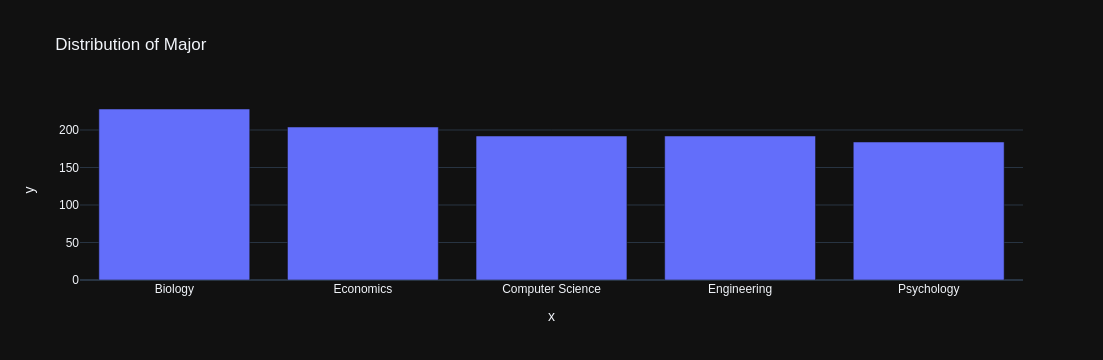

In [21]:
import plotly.express as px

# Create a bar chart for Major
fig_major = px.bar(df['major'].value_counts(), 
                   x=df['major'].value_counts().index, 
                   template = 'plotly_dark', 
                   y=df['major'].value_counts().values, 
                   title='Distribution of Major')
fig_major.show()

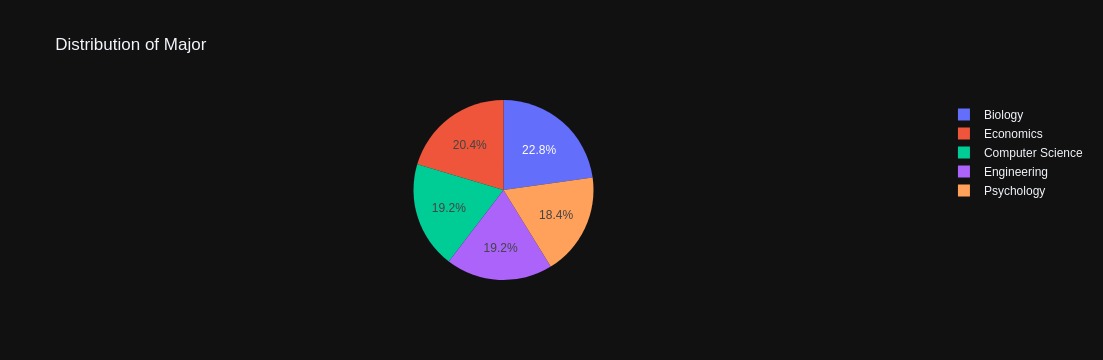

In [40]:
import plotly.express as px

# Create a pie chart for Major
fig_major_pie = px.pie(df['major'].value_counts(), 
                       values=df['major'].value_counts().values, 
                       names=df['major'].value_counts().index, 
                       template = 'plotly_dark', 
                       title='Distribution of Major')
fig_major_pie.show()

### Correlation Analysis

#### Compute correlation coefficients between numerical variables to understand the relationships between them. Visualize the correlations using a heatmap to identify any strong correlations or multicollinearity

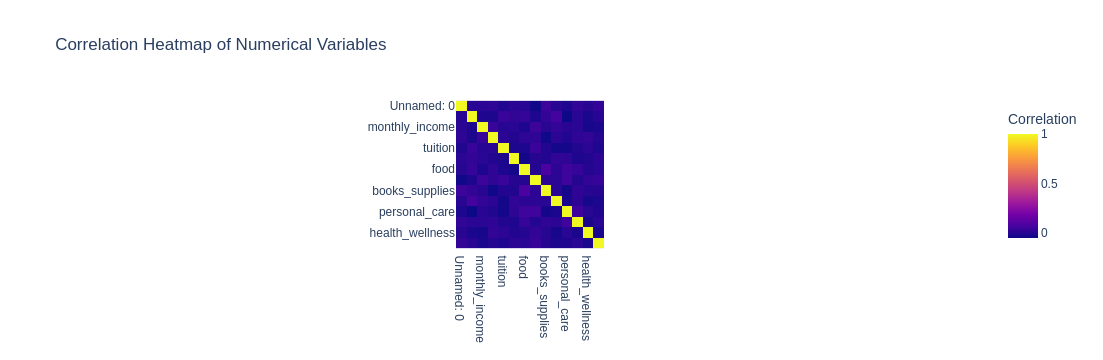

In [23]:
# Drop non-numeric columns if necessary
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Plot heatmap
fig = px.imshow(correlation_matrix,
                labels=dict(color="Correlation"),
                x=numeric_df.columns,
                y=numeric_df.columns,
                title="Correlation Heatmap of Numerical Variables")
fig.show()

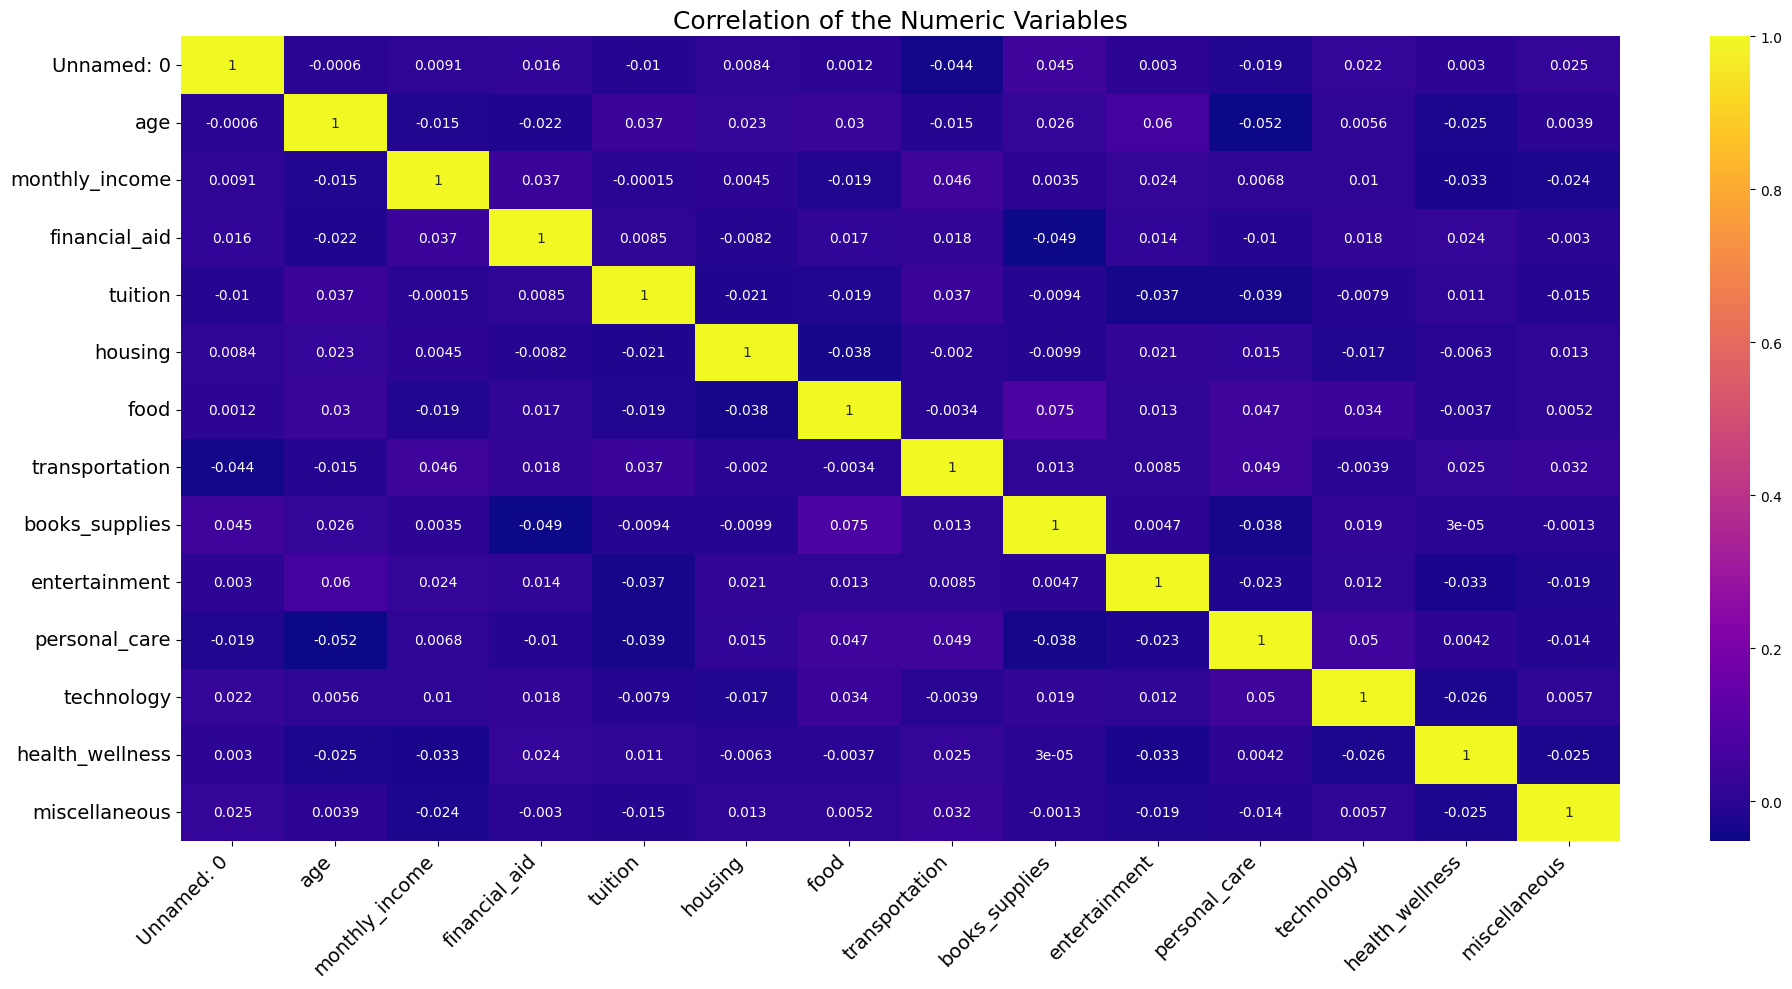

In [24]:
# Correlation of the DataFrame
numeric_df = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize = (20, 10))
sns.heatmap(correlation_matrix, annot = True, cmap = 'plasma')
plt.xticks(rotation = 45, ha = 'right', fontsize = 14)
plt.yticks(rotation = 0, ha = 'right', fontsize = 14)
plt.title('Correlation of the Numeric Variables', fontsize = 18)
plt.tight_layout()
plt.show()

### Expense Analysis

#### Analyze the distribution of expenses across different categories such as tuition, housing, food, transportation, miscelleneous. This helps in understanding where students are spending most of their money

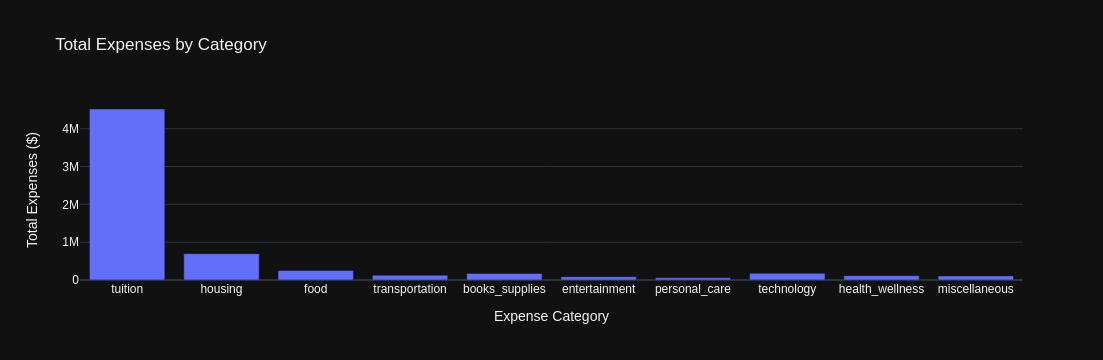

In [25]:
# Aggregate total expenses across expense categories
total_expenses = df[['tuition', 'housing', 'food', 'transportation', 
                     'books_supplies', 'entertainment', 'personal_care', 
                     'technology', 'health_wellness', 'miscellaneous']].sum()

# Create a bar chart for total expenses by category
fig_expenses = px.bar(x=total_expenses.index, y=total_expenses.values, 
                      title='Total Expenses by Category', 
                      template = 'plotly_dark', 
                      labels={'x': 'Expense Category', 'y': 'Total Expenses ($)'})
fig_expenses.show()

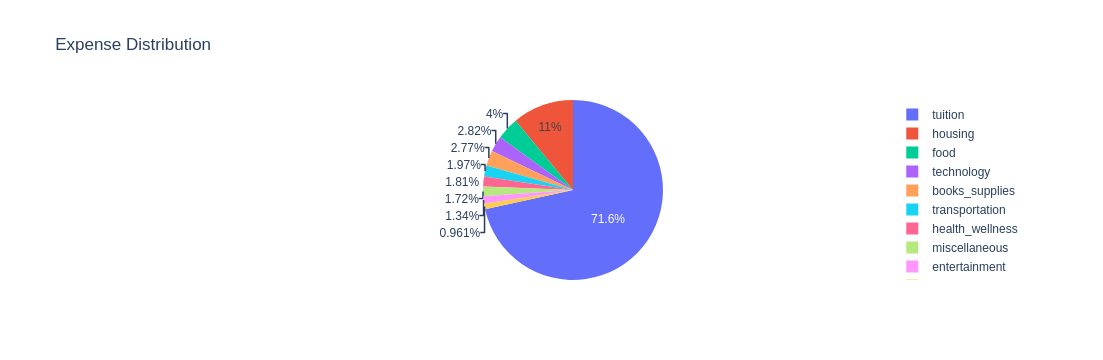

In [26]:
# Calculate percentage of expenses for each category
expense_percentages = (total_expenses / total_expenses.sum()) * 100

# Create a pie chart for expense distribution
fig_expense_pie = px.pie(names=expense_percentages.index, values=expense_percentages.values, 
                          title='Expense Distribution', 
                          labels={'names': 'Expense Category', 'values': 'Percentage of Total Expenses (%)'})
fig_expense_pie.show()

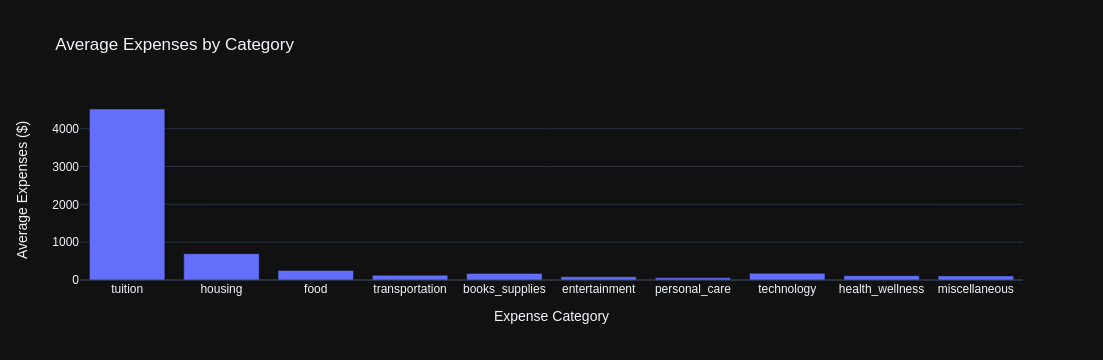

In [27]:
# Calculate average expenses across expense categories
avg_expenses = df[['tuition', 'housing', 'food', 'transportation', 
                   'books_supplies', 'entertainment', 'personal_care', 
                   'technology', 'health_wellness', 'miscellaneous']].mean()

# Create a bar chart for average expenses by category
fig_avg_expenses = px.bar(x=avg_expenses.index, y=avg_expenses.values, 
                          title='Average Expenses by Category', 
                          template = 'plotly_dark', 
                          labels={'x': 'Expense Category', 'y': 'Average Expenses ($)'})
fig_avg_expenses.show()

### Financial Aid Analysis

#### Explore the relationship between financial aid and other variables like income or expenses. This helps in understanding how financial aid affects students' spending habits. Financial Aid Analysis: Explore the relationship between financial aid and other variables like income or expenses.

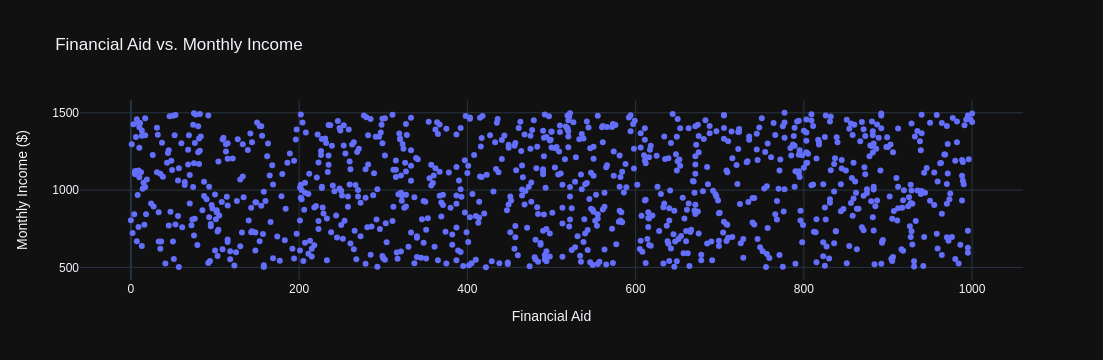

In [28]:
# Create a scatter plot for Financial Aid vs. Monthly Income
fig_scatter_income_aid = px.scatter(df, x='financial_aid', y='monthly_income', 
                                    title='Financial Aid vs. Monthly Income', 
                                    template = 'plotly_dark', 
                                    labels={'financial_aid': 'Financial Aid', 'monthly_income': 'Monthly Income ($)'})
fig_scatter_income_aid.show()

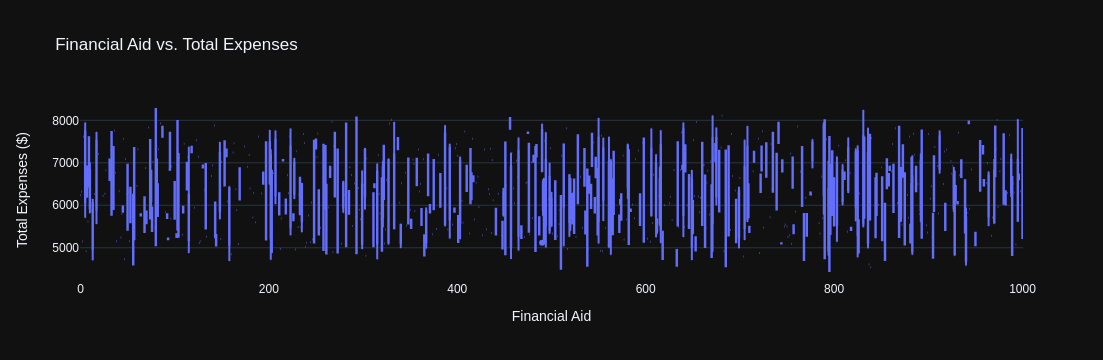

In [29]:
expense_columns = ['tuition', 'housing', 'food', 'transportation', 'books_supplies', 
                   'entertainment', 'personal_care', 'technology', 'health_wellness', 
                   'miscellaneous']
# Calculate total expenses for each student
df['total_expenses'] = df[expense_columns].sum(axis=1)

# Create a box plot for Financial Aid vs. Total Expenses
fig_box_expenses_aid = px.box(df, x='financial_aid', y='total_expenses', 
                              title='Financial Aid vs. Total Expenses',
                              template = 'plotly_dark', 
                              labels={'financial_aid': 'Financial Aid', 'total_expenses': 'Total Expenses ($)'})
fig_box_expenses_aid.show()

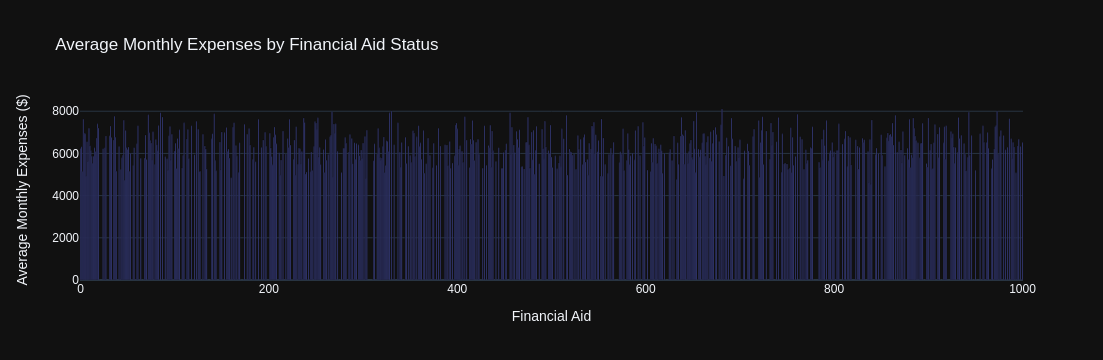

In [30]:
expense_columns = ['tuition', 'housing', 'food', 'transportation', 'books_supplies', 
                   'entertainment', 'personal_care', 'technology', 'health_wellness', 
                   'miscellaneous']
# Calculate total expenses for each student
df['total_expenses'] = df[expense_columns].sum(axis=1)

# Calculate average monthly expenses by financial aid status
avg_expenses_aid = df.groupby('financial_aid')['total_expenses'].mean().reset_index()

# Create a bar chart for Average Monthly Expenses by Financial Aid Status
fig_bar_avg_expenses_aid = px.bar(avg_expenses_aid, x='financial_aid', y='total_expenses', 
                                  title='Average Monthly Expenses by Financial Aid Status', 
                                  template = 'plotly_dark', 
                                  labels={'financial_aid': 'Financial Aid', 'total_expenses': 'Average Monthly Expenses ($)'})
fig_bar_avg_expenses_aid.show()

### Preferred Payment Method

#### Analyze the distribution of preferred payment methods among students and explore any relationships with other variables.

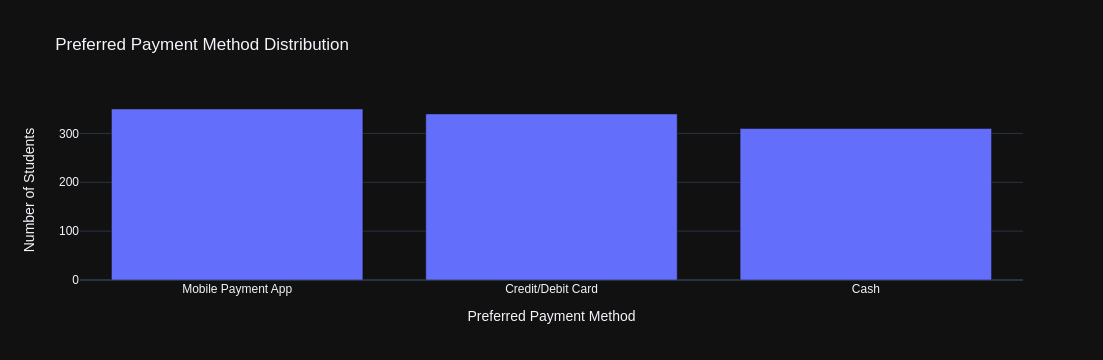

In [31]:
# Create a bar chart for Preferred Payment Method distribution
fig_payment_method = px.bar(df['preferred_payment_method'].value_counts(), 
                            x=df['preferred_payment_method'].value_counts().index, 
                            y=df['preferred_payment_method'].value_counts().values, 
                            title='Preferred Payment Method Distribution',
                            template = 'plotly_dark', 
                            labels={'x': 'Preferred Payment Method', 'y': 'Number of Students'})
fig_payment_method.show()

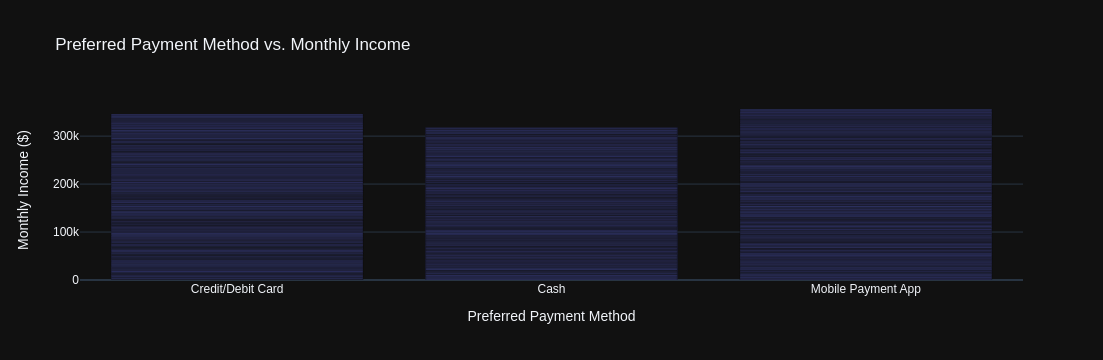

In [32]:
# Create a bar chart for Preferred Payment Method vs. Monthly Income
fig_payment_income = px.bar(df, x='preferred_payment_method', y='monthly_income', 
                            title='Preferred Payment Method vs. Monthly Income',
                            template = 'plotly_dark', 
                            labels={'preferred_payment_method': 'Preferred Payment Method',  
                                    'monthly_income': 'Monthly Income ($)'})
fig_payment_income.show()

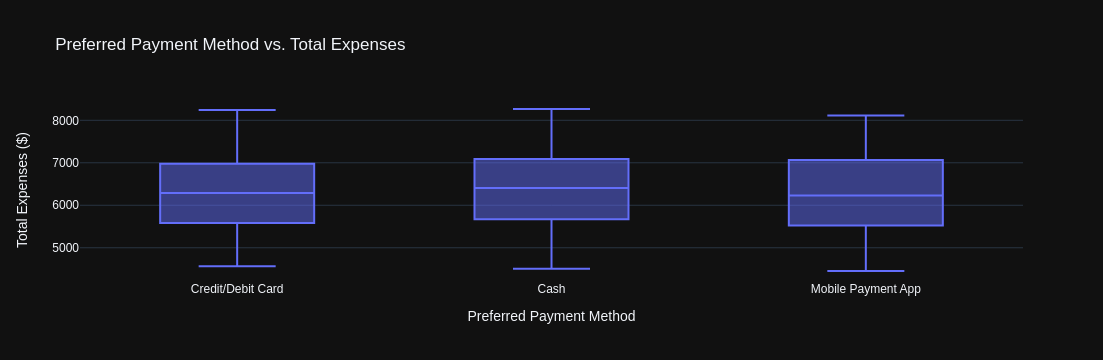

In [33]:
# Create a box plot for Preferred Payment Method vs. Total Expenses
fig_payment_expenses = px.box(df, x='preferred_payment_method', y='total_expenses', 
                              title='Preferred Payment Method vs. Total Expenses',
                              template = 'plotly_dark', 
                              labels={'preferred_payment_method': 'Preferred Payment Method', 
                                      'total_expenses': 'Total Expenses ($)'})
fig_payment_expenses.show()

# Segmentation Analysis

### Segment students based on demographic factors such as age, gender, year in school, and major.

#### In this code:

#### We group the data by each demographic factor using the groupby() function.
#### We can then perform various calculations within each group, such as calculating counts, means, medians, etc., to understand the distribution of data within each segment.
#### Finally, we print or visualize the segmentation results to analyze the demographic distribution of students in the dataset.

In [34]:
# Group students based on demographic factors
age_groups = df.groupby('age')
gender_groups = df.groupby('gender')
year_groups = df.groupby('year_in_school')
major_groups = df.groupby('major')

# Example: Calculate the count of students in each age group
age_count = age_groups.size()

# Example: Calculate the average monthly income for each gender group
gender_income = gender_groups['monthly_income'].mean()

# Example: Calculate the median expenses for each year in school group
year_expenses_median = year_groups['total_expenses'].median()

# Example: Calculate the total number of students in each major group
major_count = major_groups.size()

# Print or visualize the segmentation results
print("Student count in each age group:")
print(age_count)

print("\nAverage monthly income by gender:")
print(gender_income)

print("\nMedian expenses by year in school:")
print(year_expenses_median)

print("\nStudent count in each major group:")
print(major_count)

Student count in each age group:
age
18    124
19    108
20    111
21    118
22    130
23    128
24    136
25    145
dtype: int64

Average monthly income by gender:
gender
Female        1024.328173
Male          1008.258427
Non-binary    1030.691589
Name: monthly_income, dtype: float64

Median expenses by year in school:
year_in_school
Freshman     6282.0
Junior       6465.0
Senior       6153.0
Sophomore    6290.0
Name: total_expenses, dtype: float64

Student count in each major group:
major
Biology             228
Computer Science    192
Economics           204
Engineering         192
Psychology          184
dtype: int64


### Analyze spending habits within each segment to identify differences and similarities.

#### In this code:

#### We calculate various statistics (such as mean, median, or total) for spending categories within each demographic segment.
#### We use these calculations to analyze spending habits within each segment and identify differences and similarities.
#### You can print the results for further analysis or visualize them using plots or charts to gain insights into spending patterns within different demographic segments.

In [35]:
# Group students based on demographic factors
age_groups = df.groupby('age')
gender_groups = df.groupby('gender')
year_groups = df.groupby('year_in_school')
major_groups = df.groupby('major')

# Example: Calculate average expenses for each spending category within each age group
age_expenses_mean = age_groups[['tuition', 'housing', 'food', 'transportation', 
                                'books_supplies', 'entertainment', 'personal_care', 
                                'technology', 'health_wellness', 'miscellaneous']].mean()

# Example: Calculate median expenses for each spending category within each gender group
gender_expenses_median = gender_groups[['tuition', 'housing', 'food', 'transportation', 
                                        'books_supplies', 'entertainment', 'personal_care', 
                                        'technology', 'health_wellness', 'miscellaneous']].median()

# Example: Calculate total expenses for each spending category within each year in school group
year_expenses_total = year_groups[['tuition', 'housing', 'food', 'transportation', 
                                   'books_supplies', 'entertainment', 'personal_care', 
                                   'technology', 'health_wellness', 'miscellaneous']].sum()

# Example: Calculate average expenses for each spending category within each major group
major_expenses_mean = major_groups[['tuition', 'housing', 'food', 'transportation', 
                                    'books_supplies', 'entertainment', 'personal_care', 
                                    'technology', 'health_wellness', 'miscellaneous']].mean()

# Print or visualize the spending habits analysis results
print("Average expenses for each spending category within each age group:")
print(age_expenses_mean)

print("\nMedian expenses for each spending category within each gender group:")
print(gender_expenses_median)

print("\nTotal expenses for each spending category within each year in school group:")
print(year_expenses_total)

print("\nAverage expenses for each spending category within each major group:")
print(major_expenses_mean)

Average expenses for each spending category within each age group:
         tuition     housing        food  transportation  books_supplies  \
age                                                                        
18   4485.951613  712.241935  248.387097      124.306452      169.193548   
19   4555.388889  677.027778  242.527778      128.370370      172.953704   
20   4460.234234  658.954955  246.396396      123.306306      181.549550   
21   4487.694915  701.652542  267.974576      123.322034      173.906780   
22   4452.676923  711.776923  257.507692      123.892308      174.046154   
23   4554.484375  697.992188  248.617188      128.390625      172.179688   
24   4518.588235  697.419118  249.522059      125.448529      169.492647   
25   4628.765517  702.806897  258.234483      120.820690      184.227586   

     entertainment  personal_care  technology  health_wellness  miscellaneous  
age                                                                            
18       80.

### Utilize clustering algorithms such as K-means clustering to identify distinct spending behavior groups among students. 

In [36]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

Silhouette Score (Training): 0.07164341533360484


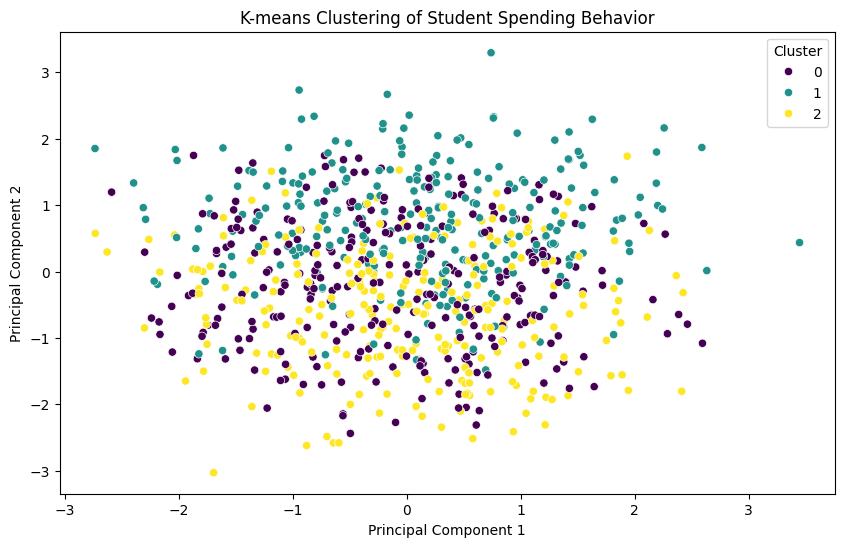


Cluster Centers:
       tuition     housing        food  transportation  books_supplies  \
0  4415.519856  730.747292  209.346570      101.144404      168.379061   
1  4665.269373  615.881919  324.505535      114.531365      192.354244   
2  4505.424603  749.817460  224.468254      160.575397      157.079365   

   entertainment  personal_care  technology  health_wellness  miscellaneous  
0      93.187726      46.263538  168.194946       102.981949     124.855596  
1      68.276753      65.922509  182.579336       113.815498     101.077491  
2      93.079365      73.424603  186.373016       127.801587      98.000000  


In [41]:
# Select relevant features for clustering
features = ['tuition', 'housing', 'food', 'transportation', 'books_supplies', 
            'entertainment', 'personal_care', 'technology', 'health_wellness', 
            'miscellaneous']

X = df[features]

# Split the dataset into training and testing sets
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Example: 3 clusters
kmeans.fit(X_train_scaled)

# Predict cluster labels for the testing set
test_cluster_labels = kmeans.predict(X_test_scaled)

# Evaluate the clustering model
# Example: Silhouette score
from sklearn.metrics import silhouette_score
silhouette_score_train = silhouette_score(X_train_scaled, kmeans.labels_)
print("Silhouette Score (Training):", silhouette_score_train)

# Visualize the results
# Example: Scatter plot of clusters
# Note: Since we cannot visualize high-dimensional data directly, we'll use Principal Component Analysis (PCA) for dimensionality reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=kmeans.labels_, palette='viridis')
plt.title('K-means Clustering of Student Spending Behavior')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

# Analyze and interpret the clusters
# Example: Calculate cluster centroids and analyze feature values
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=features)
print("\nCluster Centers:")
print(cluster_centers_df)



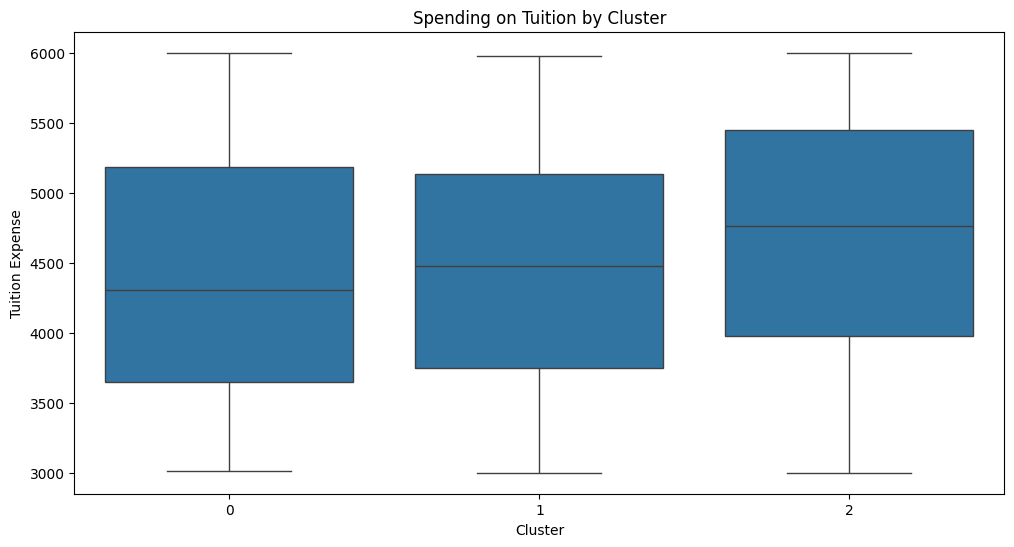

In [42]:
# Select relevant features for clustering
features = ['tuition', 'housing', 'food', 'transportation', 'books_supplies', 
            'entertainment', 'personal_care', 'technology', 'health_wellness', 
            'miscellaneous']

X = df[features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Add cluster labels to the DataFrame
df['cluster'] = kmeans.labels_

# Visualize spending habits of different clusters
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='cluster', y='tuition')
plt.title('Spending on Tuition by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Tuition Expense')
plt.show()

# Predictive Modeling

#### Build predictive models to forecast monthly expenses or financial aid requirements based on available features.
#### Utilize regression techniques to predict monthly expenses or financial aid amounts.
#### Evaluate model performance using appropriate metrics such as RMSE (Root Mean Squared Error) or MAE (Mean Absolute Error). 

In [44]:
####In this code:

##### The dataset is split into training and testing sets using the train_test_split function.
##### We initialize and train a Linear Regression model using the training data.
##### The model is then used to make predictions on the testing set.
##### Model performance is evaluated using Mean Squared Error (MSE) and Mean Absolute Error (MAE).
##### Finally, we visualize the predicted vs. actual values using a scatter plot to assess the model's performance visually.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

Mean Squared Error (MSE): 2.3202416182112428e-24
Mean Absolute Error (MAE): 1.1505107977427541e-12


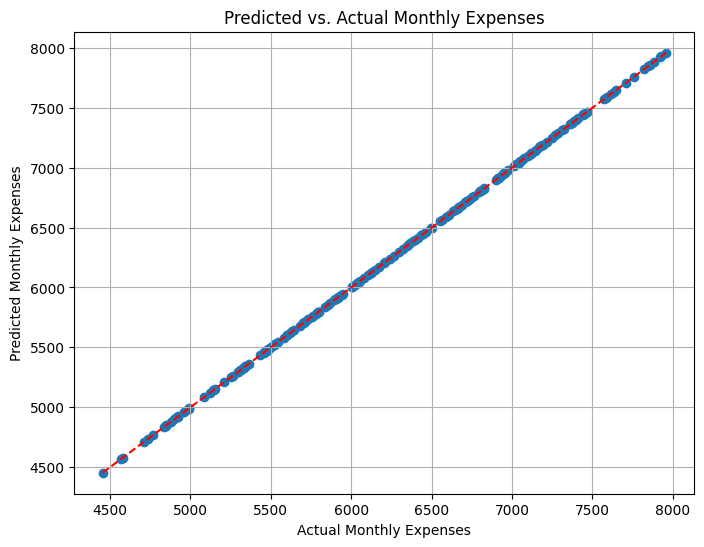

In [45]:
# List of spending categories
spending_categories = ['tuition', 'housing', 'food', 'transportation', 
                       'books_supplies', 'entertainment', 'personal_care', 
                       'technology', 'health_wellness', 'miscellaneous']

# Calculate total expenses for each student
df['total_expenses'] = df[spending_categories].sum(axis=1)




# Select relevant features and target variable
features = ['age', 'monthly_income', 'financial_aid', 'tuition', 'housing', 
            'food', 'transportation', 'books_supplies', 'entertainment', 
            'personal_care', 'technology', 'health_wellness', 'miscellaneous']
target = 'total_expenses'  # Target variable to predict (monthly expenses)

X = df[features]
y = df[target]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

# Visualize predicted vs. actual values using a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')  
plt.xlabel('Actual Monthly Expenses')
plt.ylabel('Predicted Monthly Expenses')
plt.title('Predicted vs. Actual Monthly Expenses')
plt.grid(True)
plt.show()

# Feature Importance Analysis

#### Employ techniques like feature importance scores from decision trees or permutation importance. 

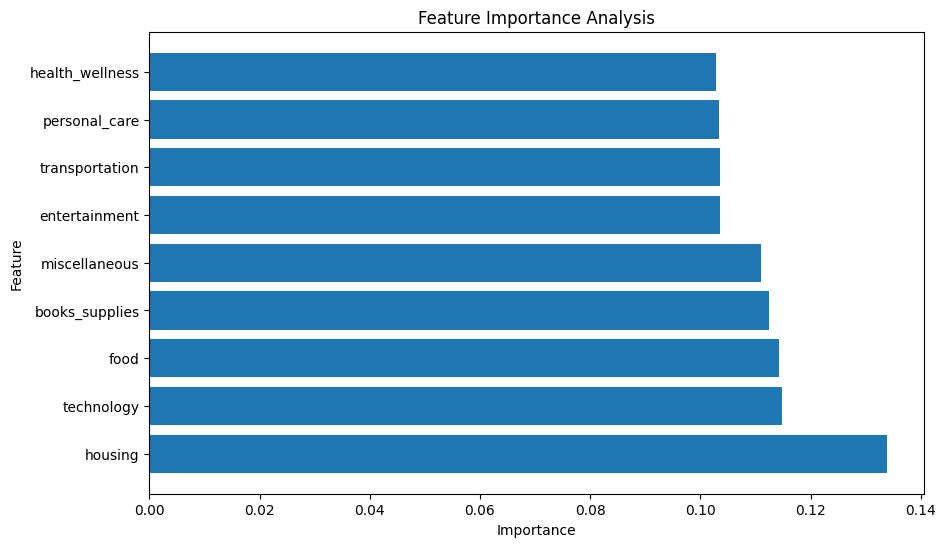

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


# Select relevant features and target variable
features = ['housing', 
            'food', 'transportation', 'books_supplies', 'entertainment', 
            'personal_care', 'technology', 'health_wellness', 'miscellaneous']
target = 'total_expenses'  # Target variable to predict (monthly expenses)

X = df[features]
y = df[target]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to visualize feature importances
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Analysis')
plt.show()

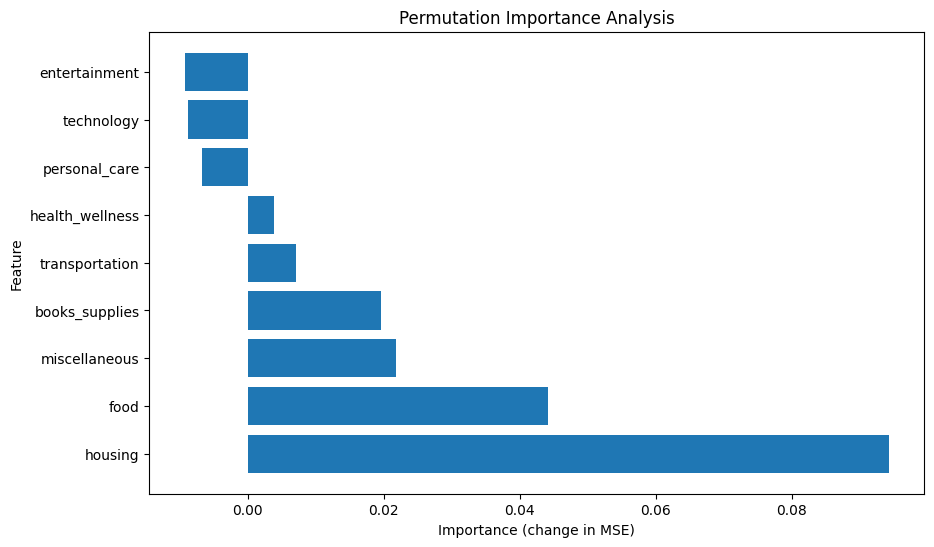

In [49]:
from sklearn.inspection import permutation_importance


# Select relevant features and target variable
features = ['housing', 
            'food', 'transportation', 'books_supplies', 'entertainment', 
            'personal_care', 'technology', 'health_wellness', 'miscellaneous']
target = 'total_expenses'  # Target variable to predict (monthly expenses)

X = df[features]
y = df[target]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Compute permutation importance
perm_importance = permutation_importance(rf_model, X_test, y_test, n_repeats=10, random_state=42)

# Create a DataFrame to organize and visualize the permutation importances
perm_importance_df = pd.DataFrame({'Feature': features, 'Importance': perm_importance.importances_mean})
perm_importance_df = perm_importance_df.sort_values(by='Importance', ascending=False)

# Plot permutation importances
plt.figure(figsize=(10, 6))
plt.barh(perm_importance_df['Feature'], perm_importance_df['Importance'])
plt.xlabel('Importance (change in MSE)')
plt.ylabel('Feature')
plt.title('Permutation Importance Analysis')
plt.show()

# Preferred Payment Method Analysis

##### Analyze students' preferred payment methods and their relationship with other variables.
##### Visualize the distribution of preferred payment methods among different demographic groups.
##### Conduct hypothesis testing to determine if there are significant differences in spending habits based on payment method preference.  

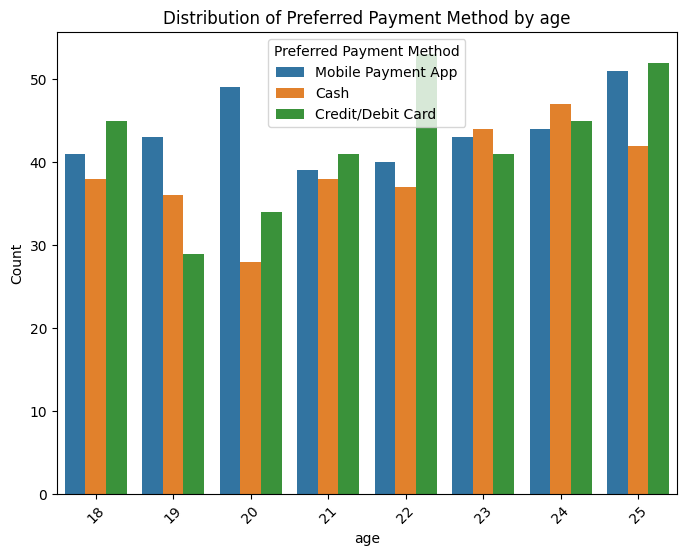

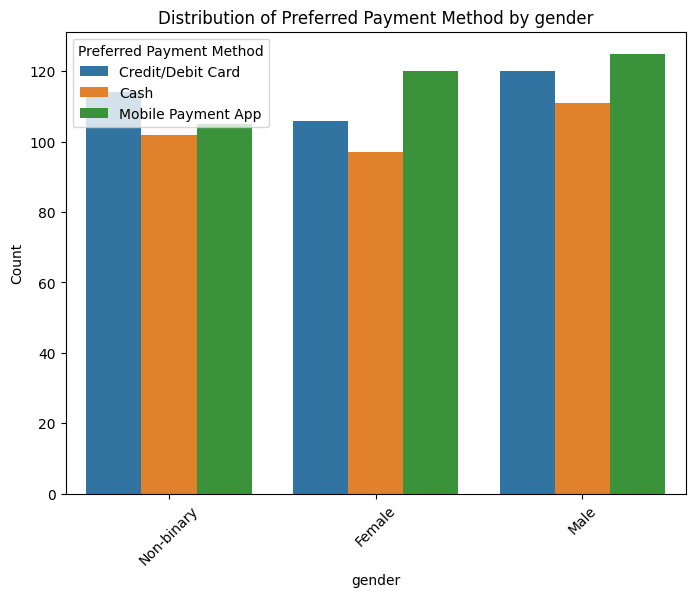

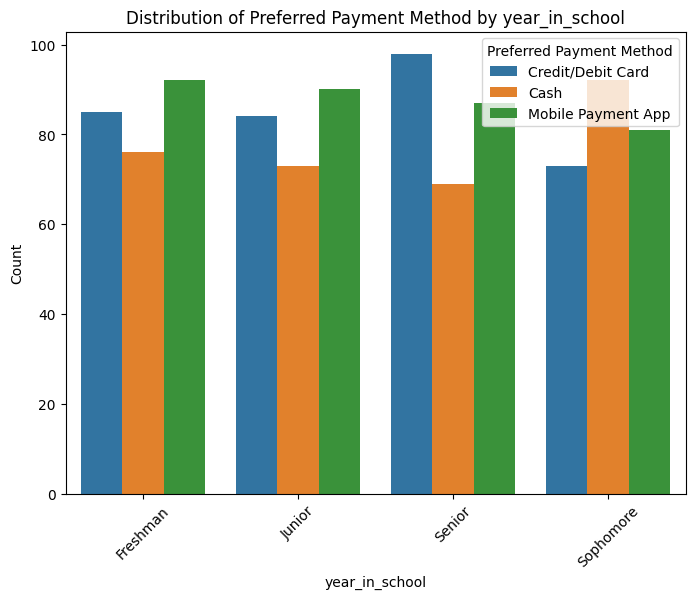

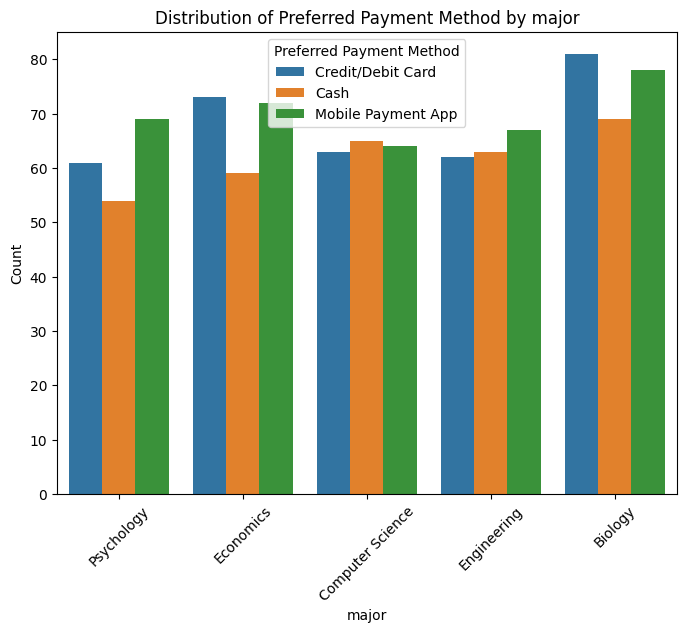

Comparison of tuition based on Preferred Payment Method:
  Payment Method: Credit/Debit Card
    T-statistic: -0.32161269203436404
    P-value: 0.7478134731371768
  Payment Method: Cash
    T-statistic: 0.7443522394424723
    P-value: 0.456838630368655
  Payment Method: Mobile Payment App
    T-statistic: -0.40219554030235727
    P-value: 0.6876262463566902
Comparison of housing based on Preferred Payment Method:
  Payment Method: Credit/Debit Card
    T-statistic: 0.08026096795309594
    P-value: 0.9360457923103439
  Payment Method: Cash
    T-statistic: -1.1614297293799134
    P-value: 0.24574488721882068
  Payment Method: Mobile Payment App
    T-statistic: 1.04628057640353
    P-value: 0.295684846245726
Comparison of food based on Preferred Payment Method:
  Payment Method: Credit/Debit Card
    T-statistic: 1.270805528290169
    P-value: 0.20409397975053611
  Payment Method: Cash
    T-statistic: -0.053462192195265795
    P-value: 0.9573743532332438
  Payment Method: Mobile Paymen

In [50]:
from scipy.stats import ttest_ind, f_oneway

# Select relevant variables including preferred payment method and other demographic or spending-related variables
payment_method_col = 'preferred_payment_method'  # Preferred payment method column
demographic_cols = ['age', 'gender', 'year_in_school', 'major']  # Demographic variables
spending_cols = ['tuition', 'housing', 'food', 'transportation', 'books_supplies', 
                 'entertainment', 'personal_care', 'technology', 'health_wellness', 
                 'miscellaneous']  # Spending variables

# Data Visualization
# Visualize the distribution of preferred payment methods among different demographic groups
for col in demographic_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=col, hue=payment_method_col)
    plt.title(f'Distribution of Preferred Payment Method by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Preferred Payment Method')
    plt.xticks(rotation=45)
    plt.show()

# Conduct Hypothesis Testing
# Compare spending habits based on payment method preference using t-tests or ANOVA
for col in spending_cols:
    print(f"Comparison of {col} based on Preferred Payment Method:")
    for method in df[payment_method_col].unique():
        group1 = df[df[payment_method_col] == method][col]
        group2 = df[df[payment_method_col] != method][col]
        t_statistic, p_value = ttest_ind(group1, group2)
        print(f"  Payment Method: {method}")
        print(f"    T-statistic: {t_statistic}")
        print(f"    P-value: {p_value}")